<a href="https://colab.research.google.com/github/MIlanJP/Capstione-Unsupervised-Customer-Segmentation/blob/master/Customer%20Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, ward,linkage
# activating DND to disregard the warnings by goiing silent mode
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Dataset
customer_data=pd.read_csv('/content/drive/MyDrive/Online Retail.csv',encoding= 'unicode_escape')

customer_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [ ]:
# Printing the shape of the dataset
customer_data.shape

(541909, 8)

In [ ]:
# Printing the information of the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# printing the first 5 samples of the dataset
customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
# printing the last 5 samples of the dataset
customer_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France


In [ ]:
# Checking all the columns present in the dataset
customer_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Printing the descriptive statistics
customer_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data Cleaning

In [ ]:
# Printing the number of the missing values in the columns
pd.DataFrame(customer_data.isna().mean()*100)

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.268311
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,24.926694
Country,0.000000


### 25 % of items purchase are not assigned to  Customers
- Hence there is no use of having the data with out customer assignment
- So its better to Delete them from data frame

<br>
<br>

 - Checking the number of the duplicate value in the dataset



In [ ]:
  # Checking duplicates
  print(len(customer_data[customer_data.duplicated()]))

5268


- Checking the change in the shape of the dataset while dropping the duplicates

In [ ]:
# Printing the shape of the dataset before removing duplicates
print('Printing the shape of datset before removing duplicates',customer_data.shape)
# Dropping duplicate rows
customer_data.drop_duplicates(inplace=True)
# Printing the shape of the dataset after removing duplicates
print('Printing the shape of datset after removing duplicates',customer_data.shape)

Printing the shape of datset before removing duplicates (541909, 8)
Printing the shape of datset after removing duplicates (536641, 8)


- Dropping the null values from the Customer ID column

In [ ]:
# Dropping the null values from the Customer ID columns
customer_data.dropna(subset=['CustomerID'],inplace=True)


- Checking the null values from the dataset

In [ ]:
# Checking the presence of the null values
customer_data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

- There are no null values in the dataset

# Feature Engineering

In [ ]:
customer_data["InvoiceDate"]=pd.to_datetime(customer_data["InvoiceDate"])
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [ ]:
# Creating new features from the datetime column InvoiceDate
customer_data["year"]      = customer_data["InvoiceDate"].apply(lambda x: x.year)
customer_data['Month']     = customer_data['InvoiceDate'].apply(lambda x: x.month_name())
customer_data['Day']       = customer_data['InvoiceDate'].apply(lambda x: x.day_name())
customer_data["hour"]      = customer_data["InvoiceDate"].apply(lambda x: x.hour)


# Data Visualization

## Converting the Invoice date to Date time datatype

In [ ]:
customer_data["InvoiceDate"]=pd.to_datetime(customer_data["InvoiceDate"])
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   year         401604 non-null  int64         
 9   Month        401604 non-null  object        
 10  Day          401604 non-null  object        
 11  hour         401604 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 39.8+ MB


## Calculating the Total Amount for each Product purchase (Quantity X Unit Price)

In [ ]:
# Creating a new feature 'TotalAmount' by multiplying Quantity and UnitPrice
customer_data['TotalAmount'] = customer_data['Quantity']*customer_data['UnitPrice']

## Extracting features from Invoice Date like

1.   date
2.   hour
3.   parts of day



In [ ]:
# Creating a new feature 'TimeType' based on hours to define whether its Morning,Afternoon or Evening
customer_data['TimeType'] = np.where((customer_data["hour"]>5)&(customer_data["hour"]<18), np.where(
                           customer_data["hour"]<12, 'Morning','Afternoon'),'Evening')

In [ ]:
# Dropping cancellations from the main dataframe
customer_data = customer_data[~customer_data['InvoiceNo'].str.contains('C')]

# Exploratory Data Analysis

## Above are list of the items in the given data that are never made a revenue (zero sales)  
- Because came back due to cancellation 

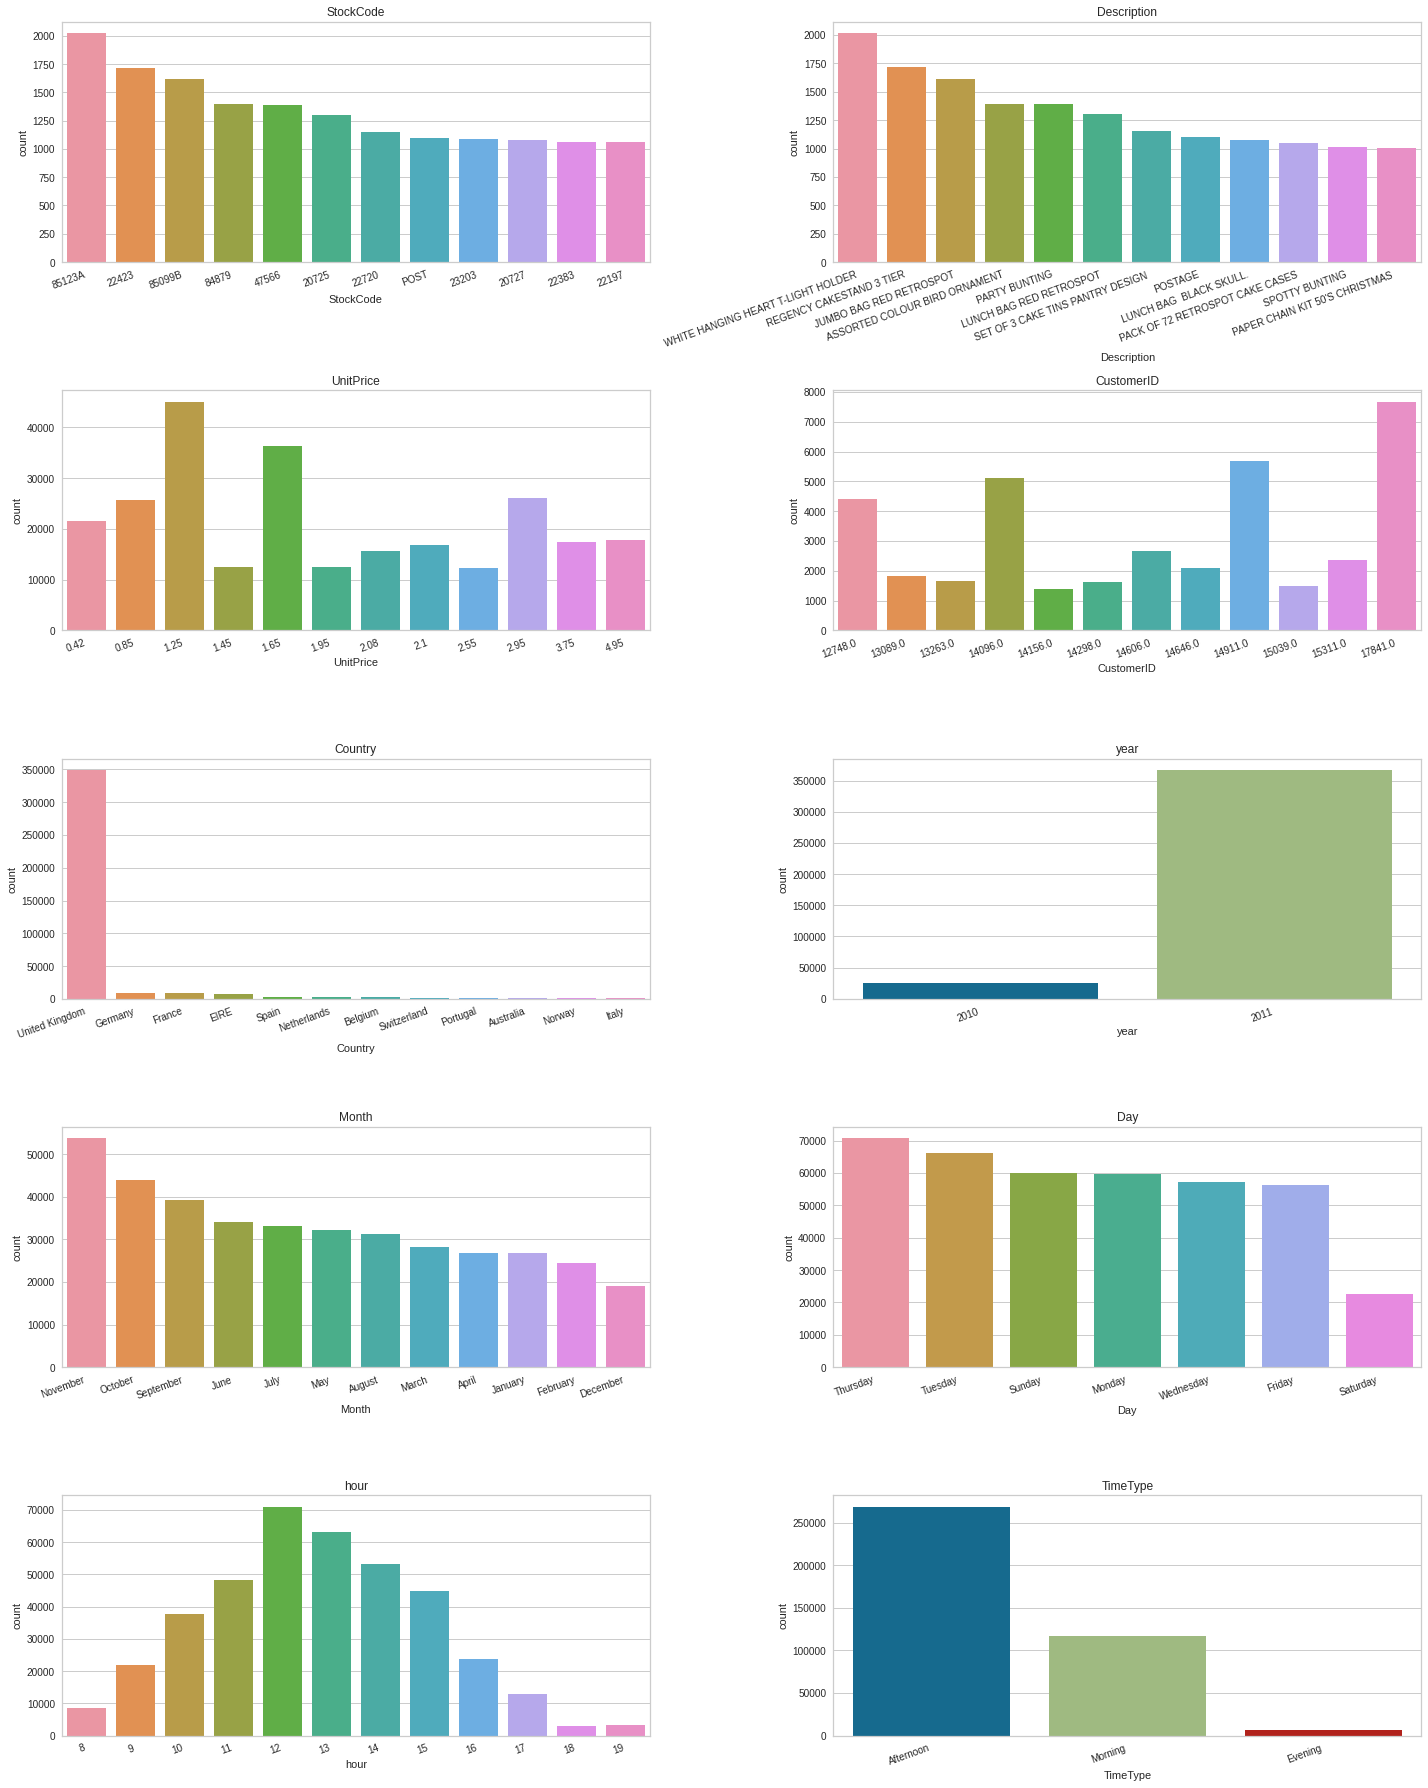

In [ ]:
# Plotting top values based on frequency in each column
target = ['StockCode', 'Description','UnitPrice', 'CustomerID', 'Country',
          'year', 'Month','Day','hour','TimeType']
plt.figure(figsize=(20,25))
for n,col in enumerate(target):
  plt.subplot(5, 2, n+1)
  temp = customer_data[col].value_counts().reset_index().head(12)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
  plt.xticks(rotation=20,ha='right')
  plt.title(target[n])
  plt.tight_layout()

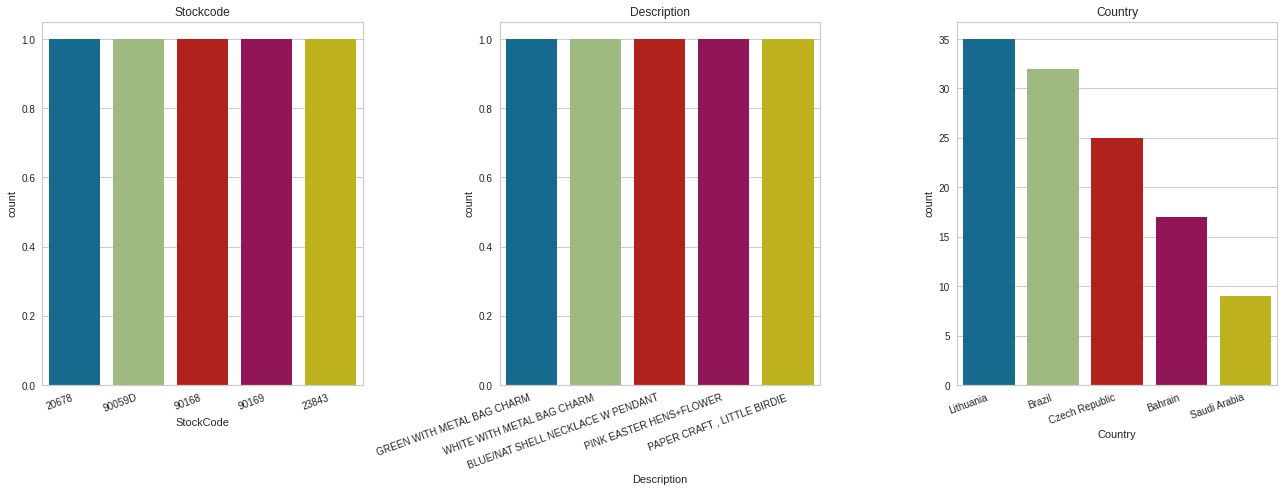

In [ ]:
# Plotting Bottom values based on frequency in each column
target = ['StockCode', 'Description','Country']
plt.figure(figsize=(18,7))
for n,col in enumerate(target):
  plt.subplot(1, 3, n+1)
  temp = customer_data[col].value_counts().reset_index().tail(5)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()

Observations/Hypothesis:
1. Most Customers are from United Kingdom. Considerable number of customers are also from Germany, France, EIRE and Spain. Whereas Saudi Arabia, Bahrain, Czech Republic, Brazil and Lithuania has least number of customers 
2. There are no orders placed on Saturdays. Looks like it's a non working day for the retailer.
3. Most of the customers have purchased the gifts in the month of November, October, December and September. Less number of customers have purchased the gifts in the month of April, January and February.
4. Most of the customers have purchased the items in Afternoon, moderate numbers of customers have purchased the items in Morning and the least in Evening.
5. WHITE HANGING HEART T-LIGHT HOLDER, REGENCY CAKESTAND 3 TIER, JUMBO BAG RED RETROSPOT are the most ordered products

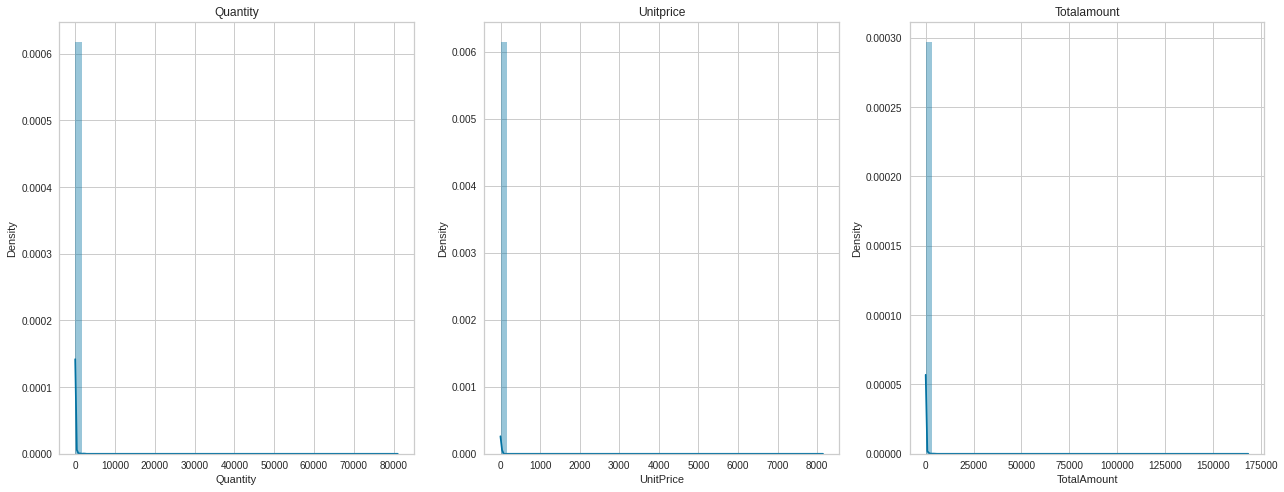

In [ ]:
# Visualizing the distributions.
target = ['Quantity','UnitPrice','TotalAmount']
plt.figure(figsize=(18,7))

for n,col in enumerate(target):
  plt.subplot(1, 3, n+1)
  sns.distplot(customer_data[col])
  plt.title(col.title())
  plt.tight_layout()

Observation:
1. It shows a positively skewed distribution because most of the values are clustered around the left side of the distribution while the right tail of the distribution is longer, which means mean>median>mode
2. For symmetric graph mean=median=mode.

[]

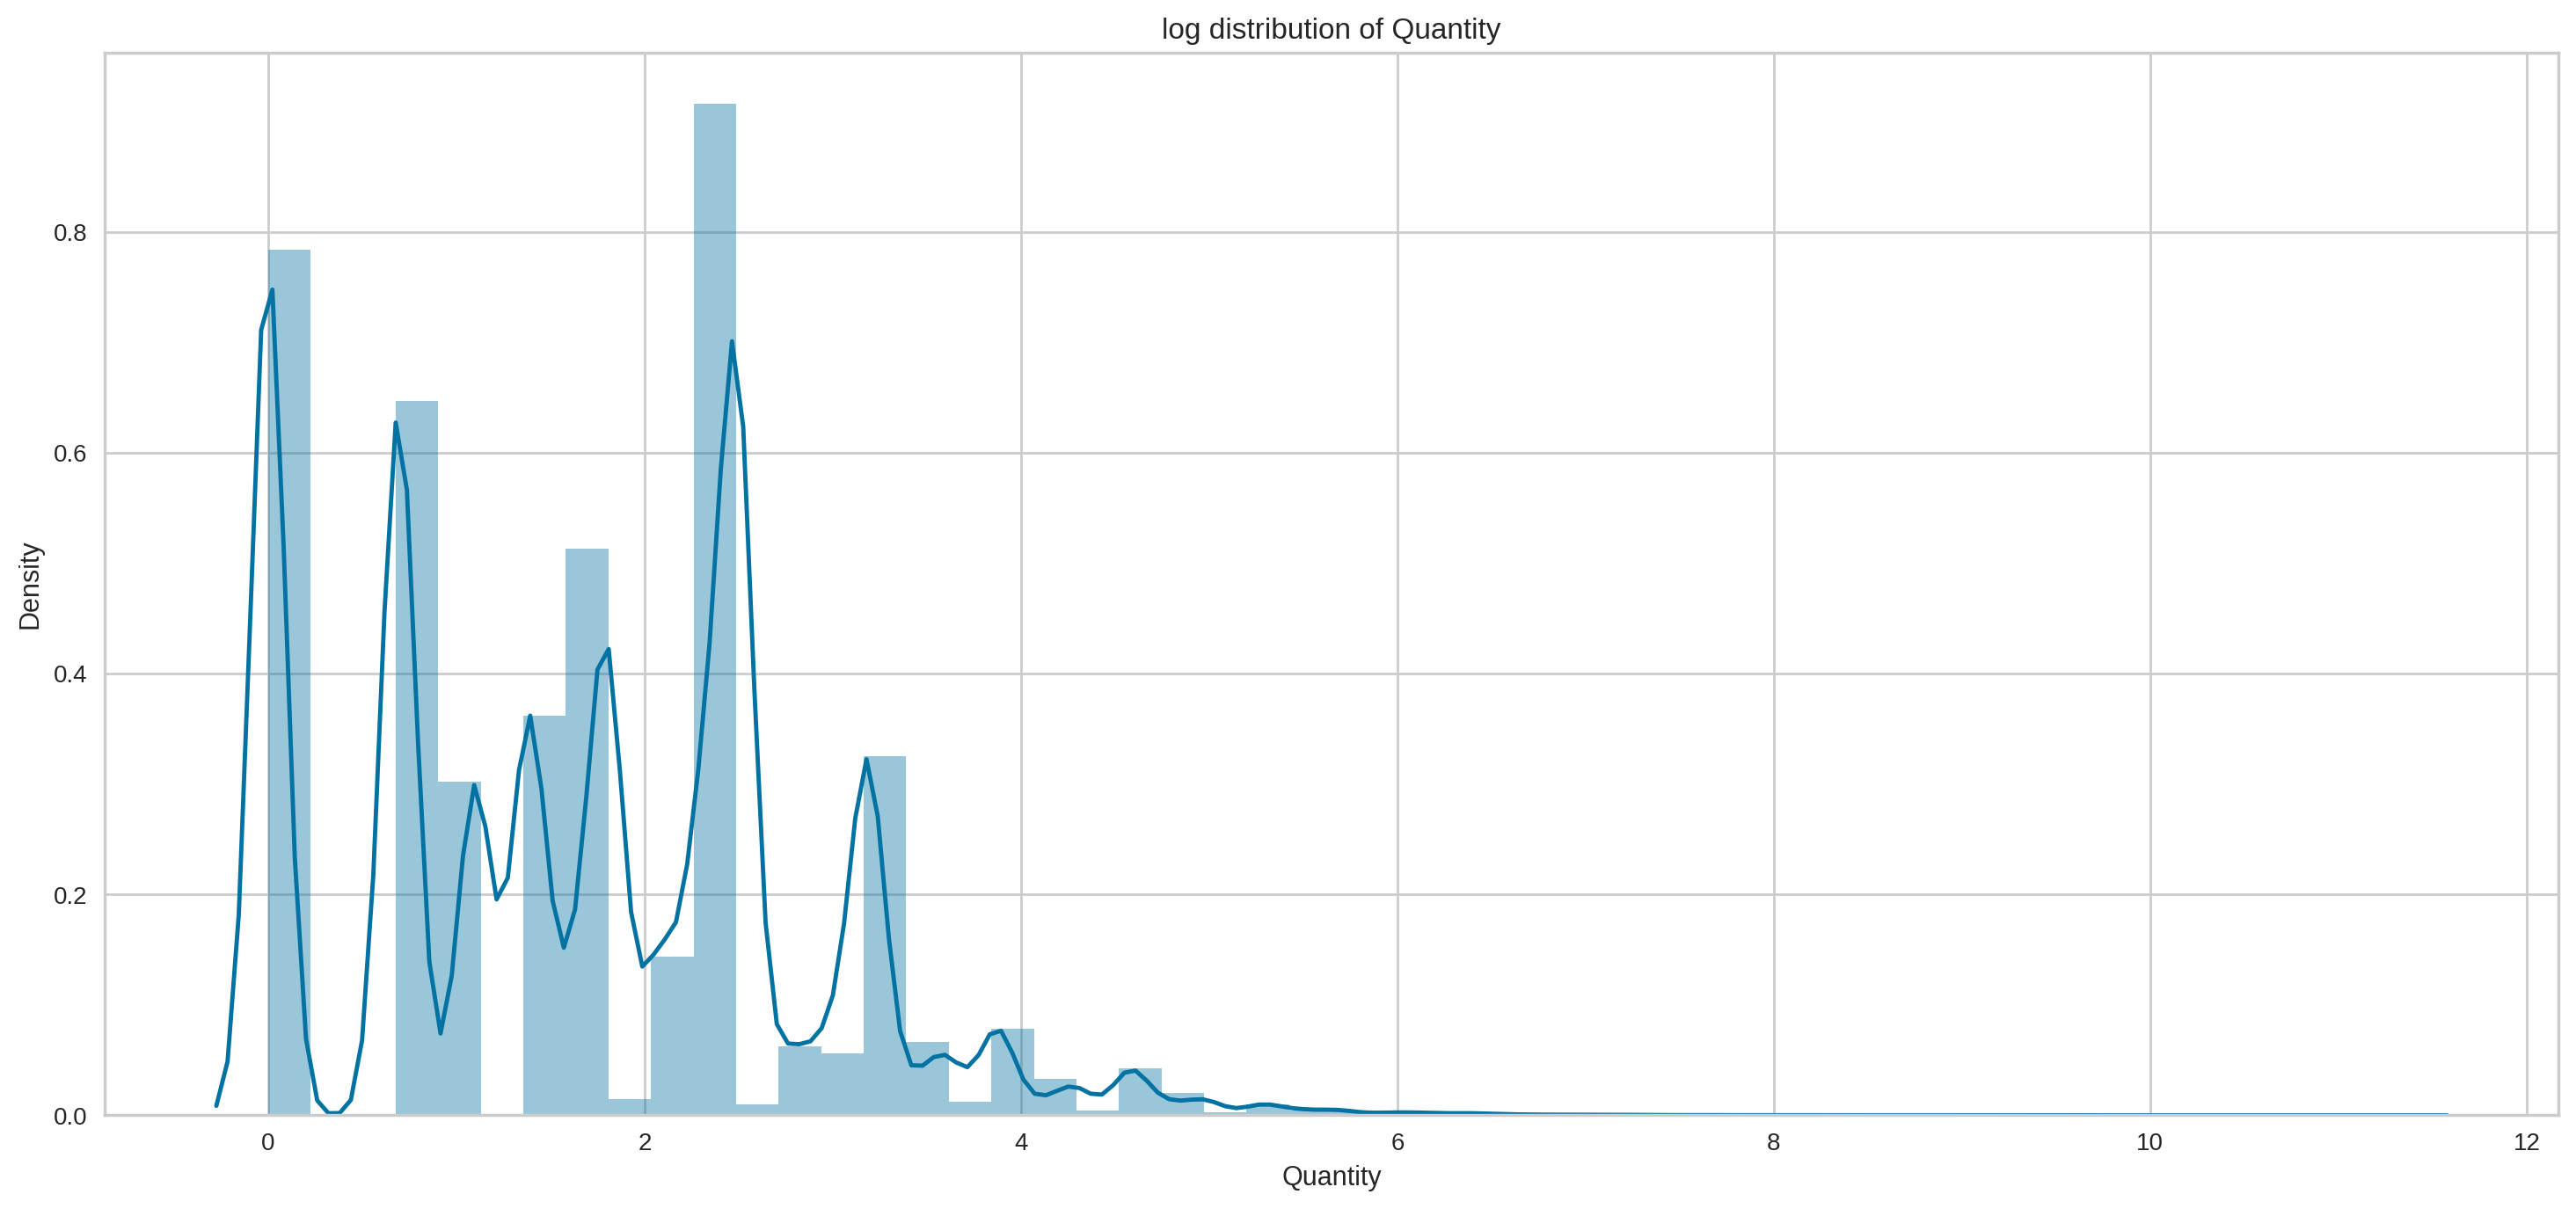

In [ ]:
# Visualizing the distributions after log transformation of Quantity
plt.figure(figsize=(18,8),dpi=200)
plt.title('log distribution of Quantity')
sns.distplot(np.log(customer_data['Quantity']))
plt.plot()

In [ ]:
# Most orders placed are from these countries
country_invoice = customer_data.groupby("Country").nunique()["InvoiceNo"].reset_index().sort_values("InvoiceNo",ascending=False)
country_invoice.rename(columns={'InvoiceNo': 'Invoice_Count'}, inplace=True)
country_invoice.head()

,Country,Invoice_Count
35,United Kingdom,16649
14,Germany,457
13,France,389
10,EIRE,260
3,Belgium,98


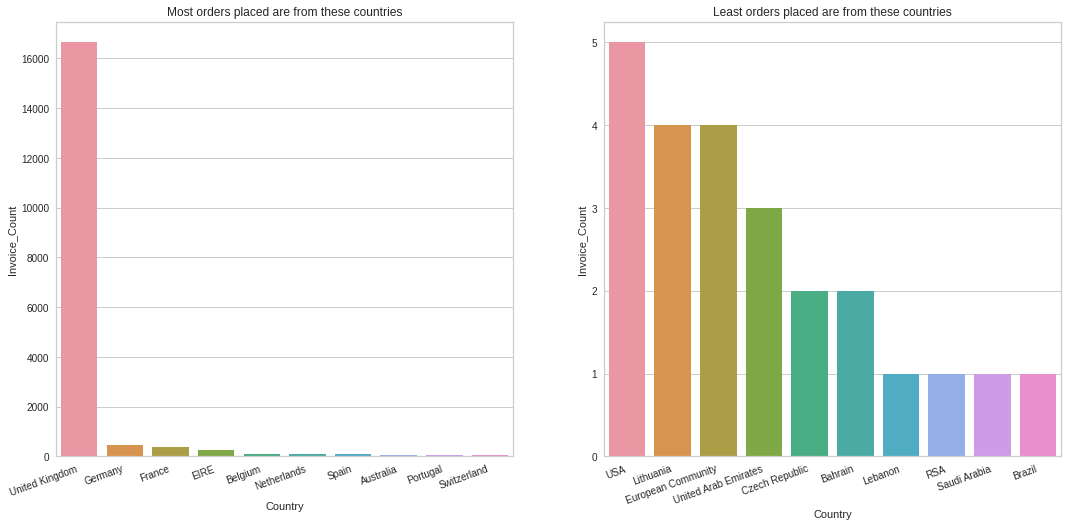

In [ ]:
# Visualizing top and bottom 10 countries based on total invoices 
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Most orders placed are from these countries")
sns.barplot(data=country_invoice.head(10),x="Country",y="Invoice_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Least orders placed are from these countries")
sns.barplot(data=country_invoice.tail(10),x="Country",y="Invoice_Count")
plt.show()

In [ ]:
# Most customers are from these countries
country_cust = customer_data.groupby("Country").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)
country_cust.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
country_cust.head()

,Country,Customer_Count
35,United Kingdom,3921
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25


* United Kingdom has most number of customers 


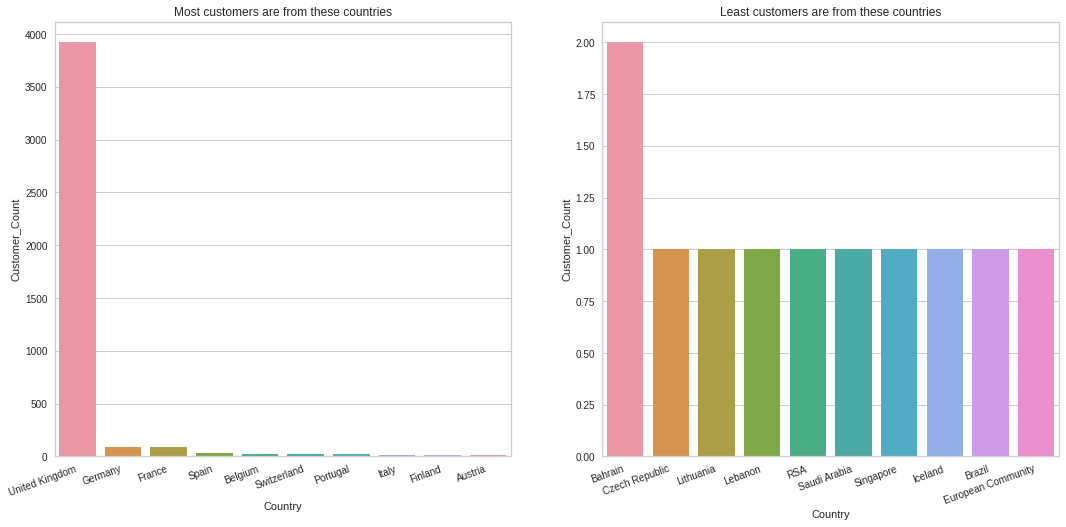

In [ ]:
# Visualizing top and bottom 10 countries based on total customers 
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Most customers are from these countries")
sns.barplot(data=country_cust.head(10),x="Country",y="Customer_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Least customers are from these countries")
sns.barplot(data=country_cust.tail(10),x="Country",y="Customer_Count")
plt.show()

In [ ]:
# Most customers are from these countries
country_cust = customer_data.groupby("Country").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)
country_cust.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
country_cust.head()

,Country,Customer_Count
35,United Kingdom,3921
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25


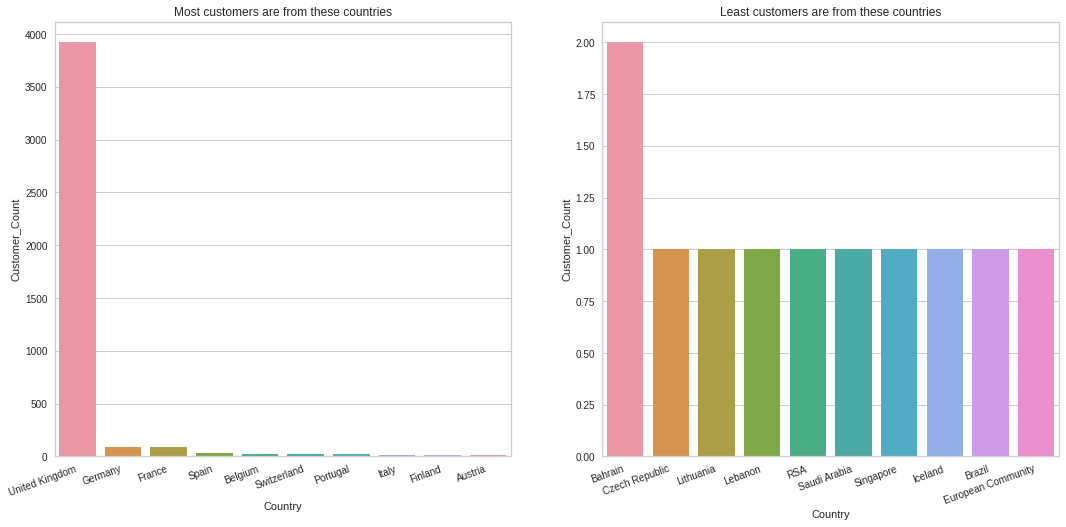

In [ ]:
# Visualizing top and bottom 10 countries based on total customers 
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Most customers are from these countries")
sns.barplot(data=country_cust.head(10),x="Country",y="Customer_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Least customers are from these countries")
sns.barplot(data=country_cust.tail(10),x="Country",y="Customer_Count")
plt.show()

In [ ]:
# Countrywise average item purchases
country_quantity = customer_data.groupby("Country").mean()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
country_quantity.rename(columns={'Quantity': 'Average_Quantity'}, inplace=True)
country_quantity.head()

,Country,Average_Quantity
23,Netherlands,85.034702
19,Japan,81.046729
31,Sweden,80.173333
0,Australia,71.114020
8,Czech Republic,26.840000


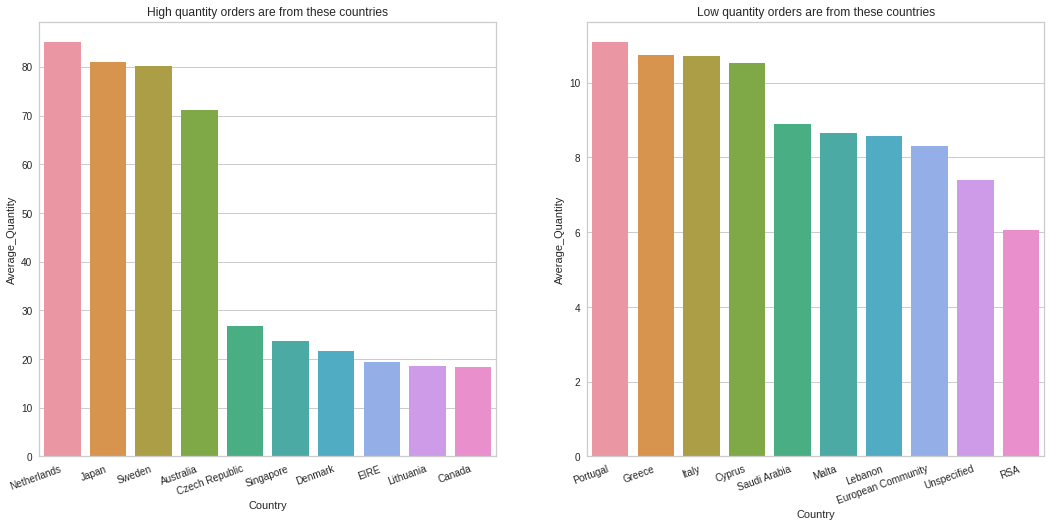

In [ ]:
# Visualizing top and bottom 10 countries based on average item purchases 
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("High quantity orders are from these countries")
sns.barplot(data=country_quantity.head(10),x="Country",y="Average_Quantity")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Low quantity orders are from these countries")
sns.barplot(data=country_quantity.tail(10),x="Country",y="Average_Quantity")
plt.show()

In [ ]:
# quantity wise item purchases
product_quantity = customer_data.groupby("Description").sum()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
product_quantity.head()

,Description,Quantity
2319,"PAPER CRAFT , LITTLE BIRDIE",80995
1992,MEDIUM CERAMIC TOP STORAGE JAR,77916
3786,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
1762,JUMBO BAG RED RETROSPOT,46078
3698,WHITE HANGING HEART T-LIGHT HOLDER,36706


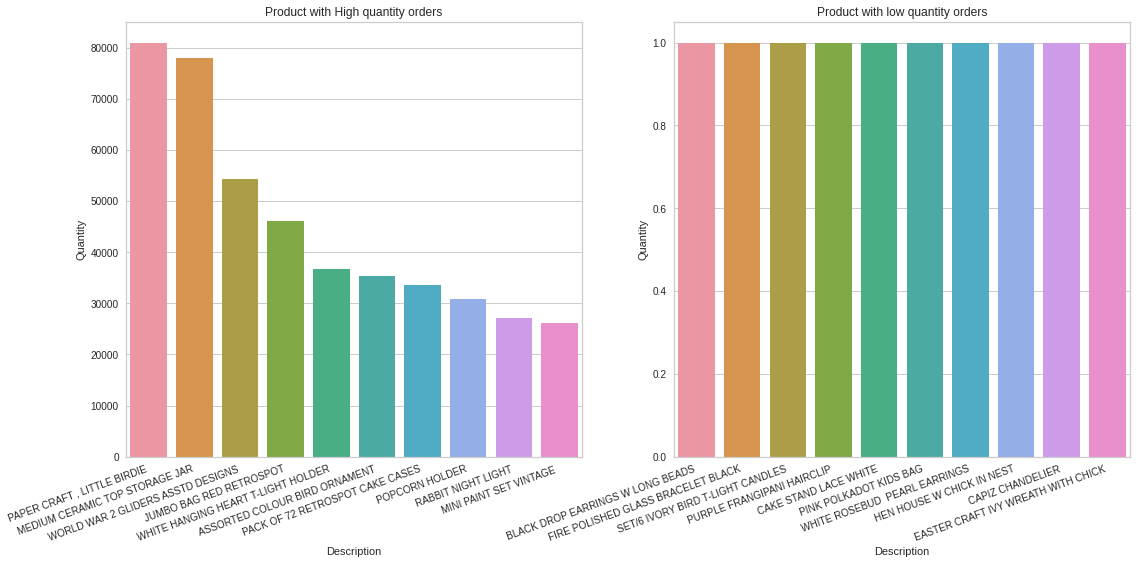

In [ ]:
# Visualizing top and bottom 10 products based on purchase quantity
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product with High quantity orders")
sns.barplot(data=product_quantity.head(10),x="Description",y="Quantity")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product with low quantity orders")
sns.barplot(data=product_quantity.tail(10),x="Description",y="Quantity")
plt.show()

In [ ]:
# Amount wise item purchases
product_price = customer_data.groupby("Description").sum()["TotalAmount"].reset_index().sort_values("TotalAmount",ascending=False)
product_price.head()

,Description,TotalAmount
2319,"PAPER CRAFT , LITTLE BIRDIE",168469.60
2767,REGENCY CAKESTAND 3 TIER,142264.75
3698,WHITE HANGING HEART T-LIGHT HOLDER,100392.10
1762,JUMBO BAG RED RETROSPOT,85040.54
1992,MEDIUM CERAMIC TOP STORAGE JAR,81416.73


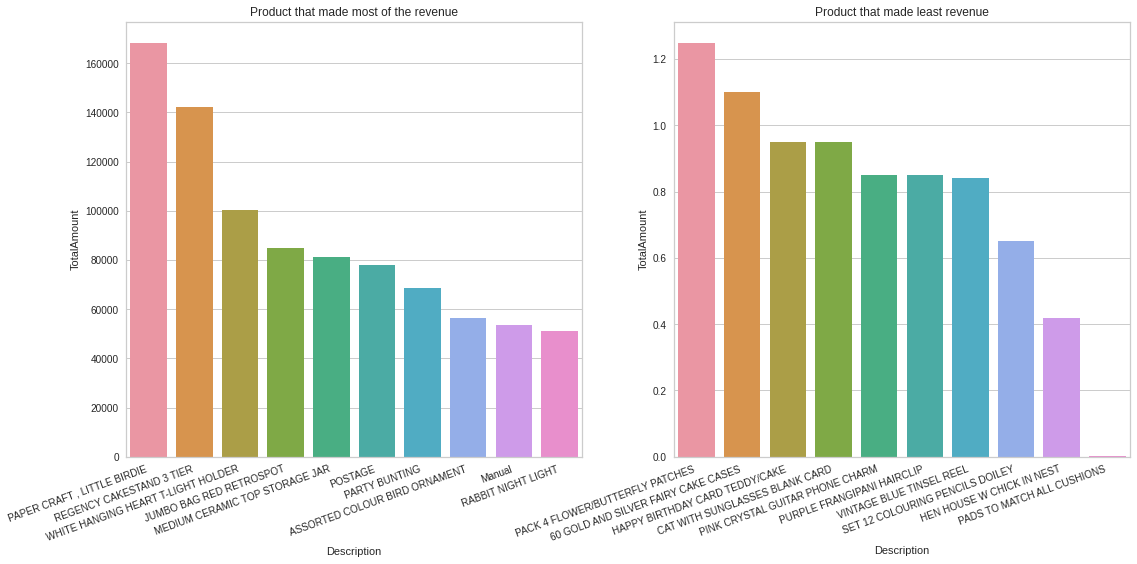

In [ ]:
# Visualizing top and bottom 10 products based on amount
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product that made most of the revenue")
sns.barplot(data=product_price.head(10),x="Description",y="TotalAmount")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product that made least revenue")
sns.barplot(data=product_price.tail(10),x="Description",y="TotalAmount")
plt.show()

In [ ]:
# customer wise item purchases
product_customer = customer_data.groupby("Description").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)
product_customer.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
product_customer.head()

,Description,Customer_Count
2767,REGENCY CAKESTAND 3 TIER,881
3698,WHITE HANGING HEART T-LIGHT HOLDER,856
2345,PARTY BUNTING,708
216,ASSORTED COLOUR BIRD ORNAMENT,678
3001,SET OF 3 CAKE TINS PANTRY DESIGN,640


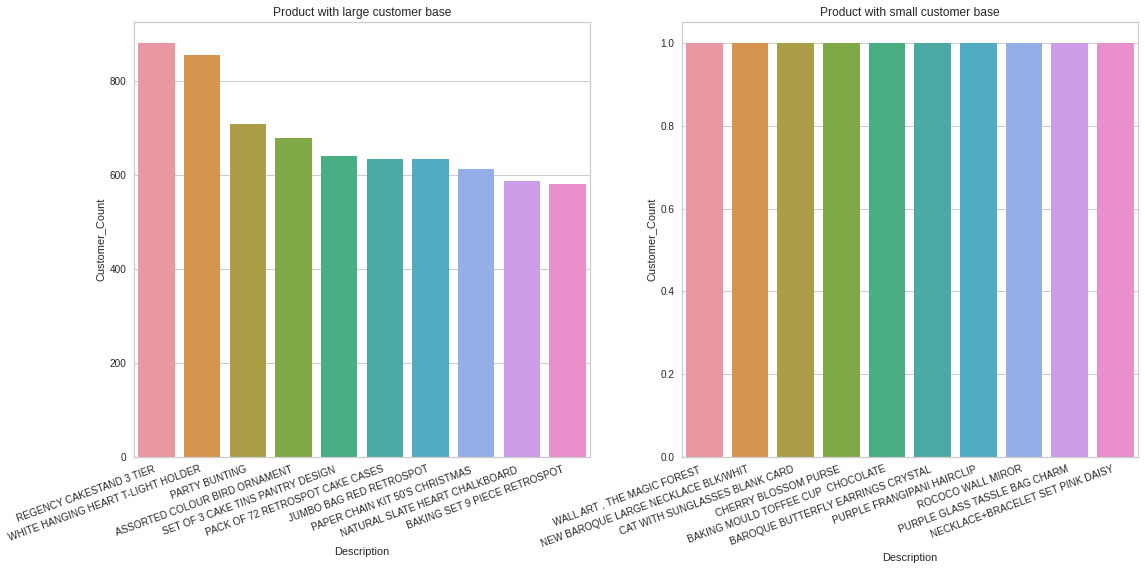

In [ ]:
# Visualizing top and bottom 10 products based on customers
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product with large customer base")
sns.barplot(data=product_customer.head(10),x="Description",y="Customer_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product with small customer base")
sns.barplot(data=product_customer.tail(10),x="Description",y="Customer_Count")
plt.show()

In [ ]:
# grouping max_sold_item
max_sold_item =customer_data.groupby("Description").sum()["TotalAmount"].reset_index().sort_values("TotalAmount",ascending=False)
max_sold_item.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
max_sold_item.head()

,Description,TotalAmount
2319,"PAPER CRAFT , LITTLE BIRDIE",168469.60
2767,REGENCY CAKESTAND 3 TIER,142264.75
3698,WHITE HANGING HEART T-LIGHT HOLDER,100392.10
1762,JUMBO BAG RED RETROSPOT,85040.54
1992,MEDIUM CERAMIC TOP STORAGE JAR,81416.73


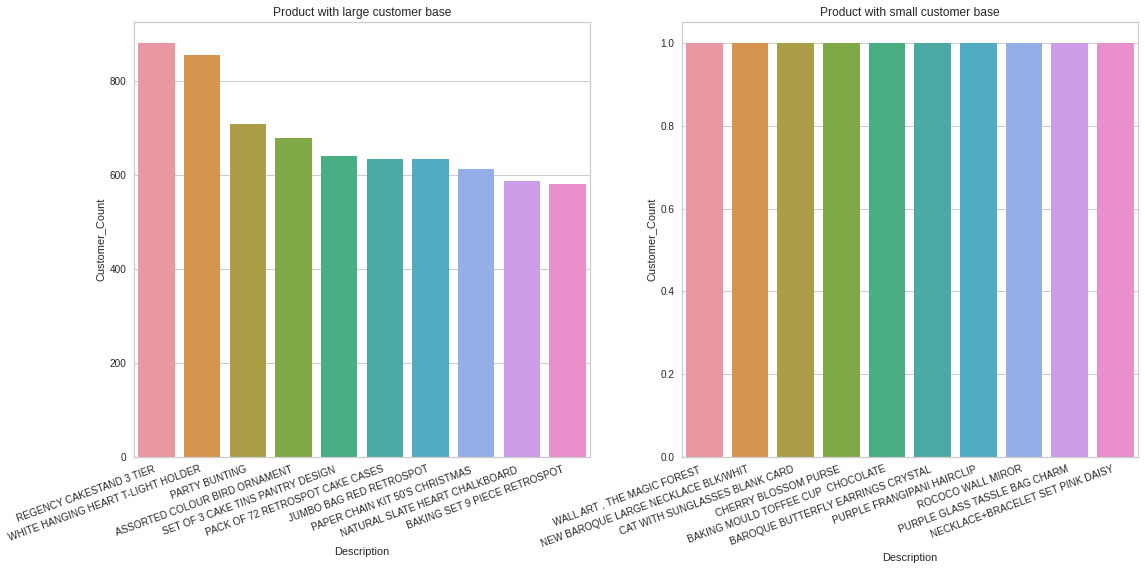

In [ ]:
# Visualizing top and bottom 10 products based on customers
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product with large customer base")
sns.barplot(data=product_customer.head(10),x="Description",y="Customer_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product with small customer base")
sns.barplot(data=product_customer.tail(10),x="Description",y="Customer_Count")
plt.show()

In [ ]:
customer_data["InvoiceDate"].max()

Timestamp('2011-12-10 17:19:00')

- The Latest Date recorded is on 10th of December 2011

## RFM analysis
### 1. R- Recency (Recent on-line visit by the customers)
### 2. F- Frequency (How frequently customers visits on-line page)
### 3. M- Monetary (How much customers have spend by purchasing on-line products )

1. Since Most of the Customers are wholesalers we cannot group customers based on the **demographic group like age, gender, income** and **behavioral and psycho-graphic group**
2. Because Our Customers purchase bunch of goods from us and sell it to individual customers
3. We only need to deal issues and make clusters related to B2B Business to Business instead of B2C  i.e. Direct from Business to Customers
4. **WHY BECAUSE PEOPLE WHO PURCHASE PRODUCTS FROM US DO NOT UTILIZE IT** 
5. ***They sell it to individual customers(B2C) or sell all products to another stores (B2B)***

# Due to all these reasons we need to cluster customers according to there activities i.e
## 1. R- Recency
## 2. F- Frequency
## 3. M- Monetary


### We need to group customers by  
### 1. High Profile (Spends more Visits More)
### 2. Medium Profile (Spends Less Average On-line site Visit frequency )
### 3. Low Profile (Less On-line Site visit frequency (Customer about to lose interest [ Churning ]))

Source=https://www.optimove.com/resources/learning-center/rfm-segmentation

In [ ]:
# Adding 1 day to the Last Invoice date to set as Latest date for reference
LatestDate = customer_data["InvoiceDate"].max() + pd.DateOffset(days=1)

# Creating a new dataframe to calculate Recency, Frequency and Monetary scores for each customer
rfm = customer_data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (LatestDate - x.max()).days,
                                    'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

# Renaming the columns
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency',
                    'TotalAmount': 'Monetary'}, inplace=True)

# Checking top 5 rows
rfm.reset_index().head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,327,1,77183.60
1,12347.0,41,182,4310.00
2,12348.0,77,31,1797.24
3,12349.0,20,73,1757.55
4,12350.0,312,17,334.40


In [ ]:
rfm.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,106.430053,90.512100,2048.215924
std,115.075862,225.515328,8984.248352
min,1.000000,1.000000,0.000000
25%,23.000000,17.000000,306.455000
50%,62.000000,41.000000,668.560000
75%,162.500000,98.000000,1660.315000
max,698.000000,7676.000000,280206.020000


In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4339 non-null   int64  
 1   Frequency  4339 non-null   int64  
 2   Monetary   4339 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.6 KB


 **Interpretation** 

1. Recency: How recent a customer made a purchase.
2. Frequency: How often a customer makes a purchase.
3. Monetary: How much money a customer spends.**bold text**

In [ ]:
# Calculating R, F and M scores by splitting Recency, Frequency	and Monetary based on quantiles
rfm['R'] = pd.qcut(rfm['Recency'], q=4, labels=[4,3,2,1]).astype(int)
rfm['F'] = pd.qcut(rfm['Frequency'], q=4, labels=[1,2,3,4]).astype(int)
rfm['M'] = pd.qcut(rfm['Monetary'], q=4, labels=[1,2,3,4]).astype(int)

# Finding the RFM Group for each customer by combining the factors R,Fand M
rfm['RFM'] = 100*rfm['R'] + 10*rfm['F'] + rfm['M']

# Finding the RFM Score for each customer by adding the factors R,Fand M
rfm['RFM_Score'] = rfm['R'] + rfm['F'] + rfm['M']



Interpretation:
1. If the RFM of any customer is 444. His Recency is good, frequency is more and Monetary is more. So, he is the best customer.
2. If the RFM of any customer is 111. His Recency is low, frequency is low and Monetary is low. So, he is the churning customer.
3. If the RFM of any customer is 144. He purchased a long time ago but buys frequently and spends more. And so on.
4. Like this we can come up with number of segments for all combinations of R,F and M base on our usecase. Higher the RFM score, more valuable the customer is.

In [ ]:
# Handling the zeroes in the dataframe to avoid error in transformations
rfm.replace(0.0,1,inplace=True)

# Applying Log transformation on columns for smoothening the distribution
rfm['Recency_Log']   = rfm['Recency'].apply(np.log)
rfm['Frequency_Log'] = rfm['Frequency'].apply(np.log)
rfm['Monetary_Log']  = rfm['Monetary'].apply(np.log)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,Recency_Log,Frequency_Log,Monetary_Log
CustomerID,,,,,,,,,,,
12346.0,327,1,77183.60,1,1,4,114,6,5.789960,0.000000,11.253942
12347.0,41,182,4310.00,3,4,4,344,11,3.713572,5.204007,8.368693
12348.0,77,31,1797.24,2,2,4,224,8,4.343805,3.433987,7.494007
12349.0,20,73,1757.55,4,3,4,434,11,2.995732,4.290459,7.471676
12350.0,312,17,334.40,1,1,2,112,4,5.743003,2.833213,5.812338


In [ ]:
# Checking Descriptive Stats
rfm.describe()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,Recency_Log,Frequency_Log,Monetary_Log
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,106.430053,90.512100,2048.216154,2.514865,2.487670,2.499885,278.863102,7.502420,3.997700,3.670868,6.584187
std,115.075862,225.515328,8984.248299,1.125564,1.122724,1.118266,118.324959,2.790549,1.332004,1.321685,1.265573
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,111.000000,3.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,306.455000,1.500000,1.000000,1.500000,177.500000,5.000000,3.135494,2.833213,5.725071
50%,62.000000,41.000000,668.560000,3.000000,2.000000,2.000000,311.000000,7.000000,4.127134,3.713572,6.505126
75%,162.500000,98.000000,1660.315000,4.000000,3.000000,3.500000,411.000000,10.000000,5.090673,4.584967,7.414763
max,698.000000,7676.000000,280206.020000,4.000000,4.000000,4.000000,444.000000,12.000000,6.548219,8.945854,12.543280


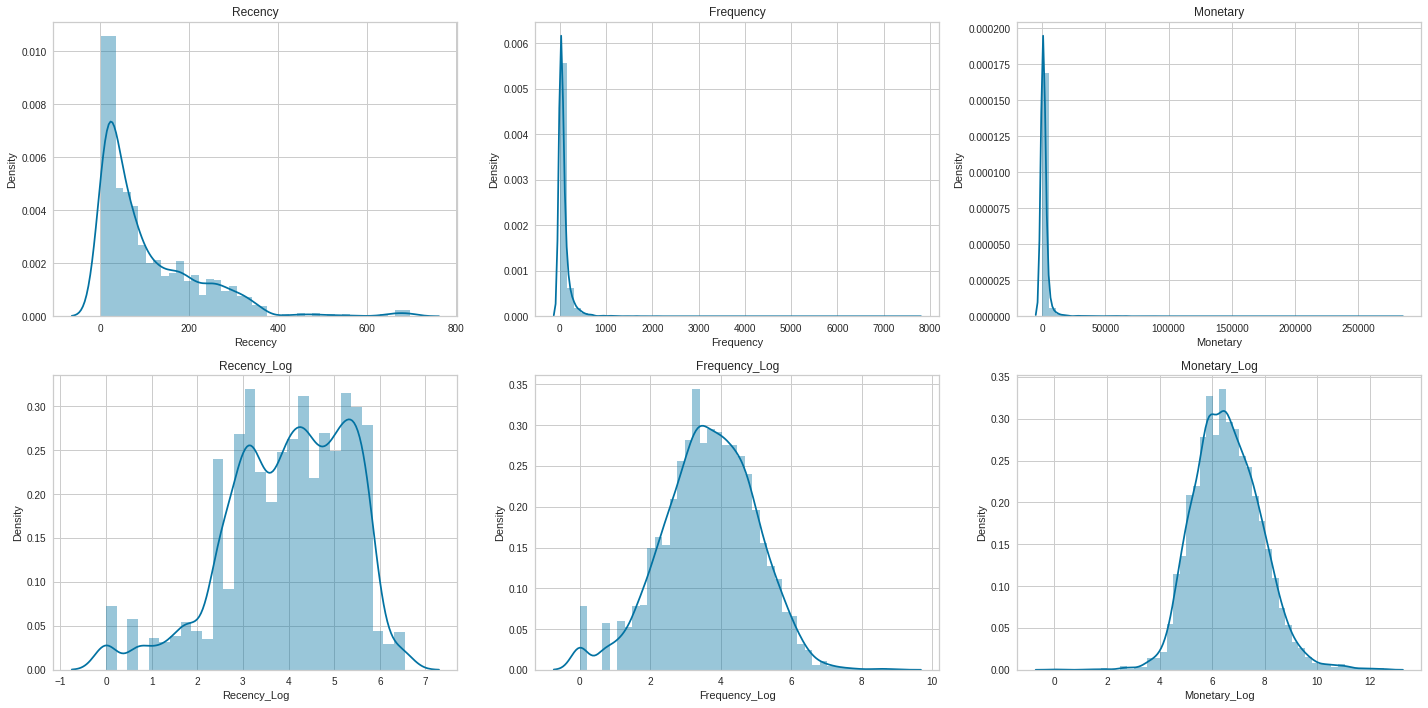

In [ ]:
# Visualizing the distributions before and after log transformation.
target = ['Recency', 'Frequency',	'Monetary', 'Recency_Log', 'Frequency_Log', 'Monetary_Log']
plt.figure(figsize=(20,10))
for n,col in enumerate(target):
  plt.subplot(2, 3, n+1)
  sns.distplot(rfm[col])
  plt.title(col.title())
  plt.tight_layout()

Observations:
1. Earlier the distributions of Recency, Frequency and Monetary columns were positively skewed but after applying log transformation, the distributions appear to be symmetrical and normally distributed.
2. It will be more suitable to use the transformed features for better visualisation of clusters.

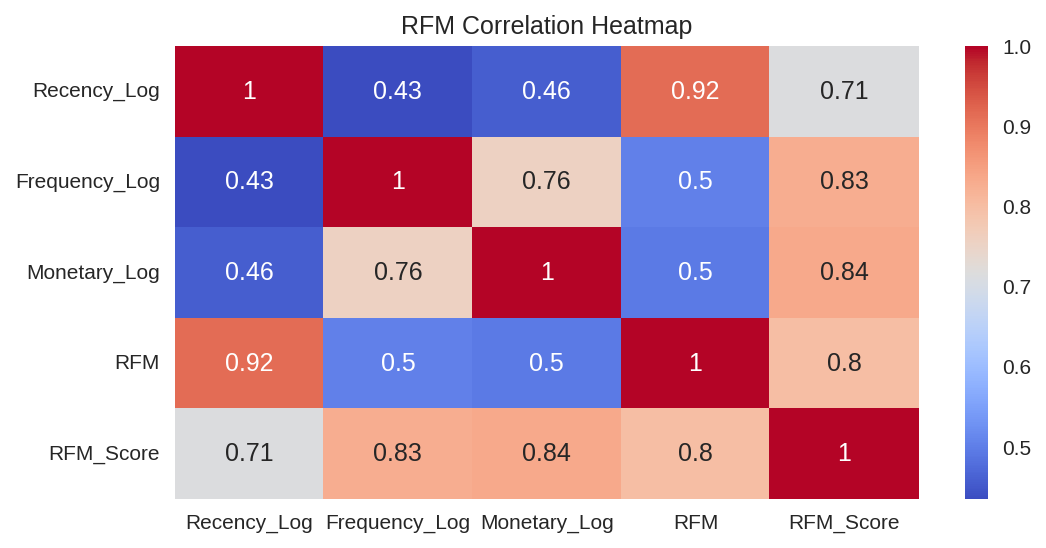

In [ ]:
# Visualizing the correlations among features.
target = ['Recency_Log','Frequency_Log','Monetary_Log','RFM','RFM_Score']
plt.figure(figsize = (8, 4),dpi=150)
sns.heatmap(abs(rfm[target].corr()), annot=True, cmap='coolwarm')
plt.title('RFM Correlation Heatmap')
plt.show()

# **Clustering**

# **Modelling**

In [ ]:
X=rfm[["Recency_Log",'Frequency_Log','Monetary_Log']]
X=StandardScaler().fit_transform(X)

In [321]:
from IPython.core.pylabtools import figsize

def cap_outliers(col,overlap_supress):
  condition1=col < col.quantile(1-overlap_supress)
  condition2=col > col.quantile(overlap_supress)
  return col[condition1 & condition2]

# Defining a function for plotting clusters for Visualization
def plotc(y, title,segment_name,overlap_supress=0.1):
  '''Takes predicted y labels as input and plots 3d visualization of clusters and 
  Displays the mean median and count of Recency, Frequency and Monetary for each group'''
  plt.figure(figsize = (18, 8))
  ax = plt.axes(projection ="3d")
  ax.set_xlabel('Recency', fontweight ='bold')
  ax.set_ylabel('Frequency', fontweight ='bold')
  ax.set_zlabel('Monetary', fontweight ='bold')
  ax.set_title(title, fontweight ='bold')
  ax = ax.scatter(X[:, 0], X[:, 1], X[:, 2] ,c=y, cmap='viridis')
  plt.legend(*ax.legend_elements(), loc=1)
  plt.show()

  # Displaying the mean median and count of Recency, Frequency and Monetary for each group
  rfm[segment_name] = y
  agg_= rfm[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg(['mean','median'])
  agg_1= rfm[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg(
      {"Recency":lambda x:f'Visited {int(x.quantile(0.25))} TO {int(x.quantile(0.75))}  months ago',
       "Frequency":lambda x:f"Bought {int(x.quantile(0.25))} TO {int(x.quantile(0.75))}  Times",
       "Monetary":lambda x:f"Spent Around {int(x.quantile(0.25))} TO {int(x.quantile(0.75))} Sterling ",
       
       })
  display(agg_1)
  agg_[f'Count {segment_name}']=rfm[segment_name].value_counts()
  rfm_copy=rfm.copy()
      
  fig,ax=plt.subplots(3,figsize=(25,25))
  groups_recency=[]
  groups_frequency=[]
  groups_monetary=[]
  for i in rfm[segment_name].unique():
    groups_recency.append(f'Recency Distribution of Group {i}')
    groups_frequency.append(f'Frequency Distribution of Group {i}')
    groups_monetary.append(f'Monetary Distribution of Group {i}')
    sns.distplot(cap_outliers(rfm_copy[rfm_copy[segment_name]==i]["Recency"],overlap_supress),ax=ax[0],label=f'Recency Distribution of Group {i}')
    ax[0].set_title("Recency",fontsize=40) 

    sns.distplot(cap_outliers(rfm_copy[rfm_copy[segment_name]==i]["Frequency"],overlap_supress),ax=ax[1],label=f'Frequency Distribution Group {i}')
    ax[1].set_title("Frequency",fontsize=40) 


    sns.distplot(cap_outliers(rfm_copy[rfm_copy[segment_name]==i]["Monetary"],overlap_supress),ax=ax[2],label=f'Monetary Distribution of Group {i}')
    ax[2].set_title("Monetary",fontsize=40) 

  ax[0].legend(groups_recency,prop={'size': 30})
  ax[1].legend(groups_frequency,prop={'size': 30})
  ax[2].legend(groups_monetary,prop={'size': 30})
  plt.show()
  return agg_


# Binning RFM Score

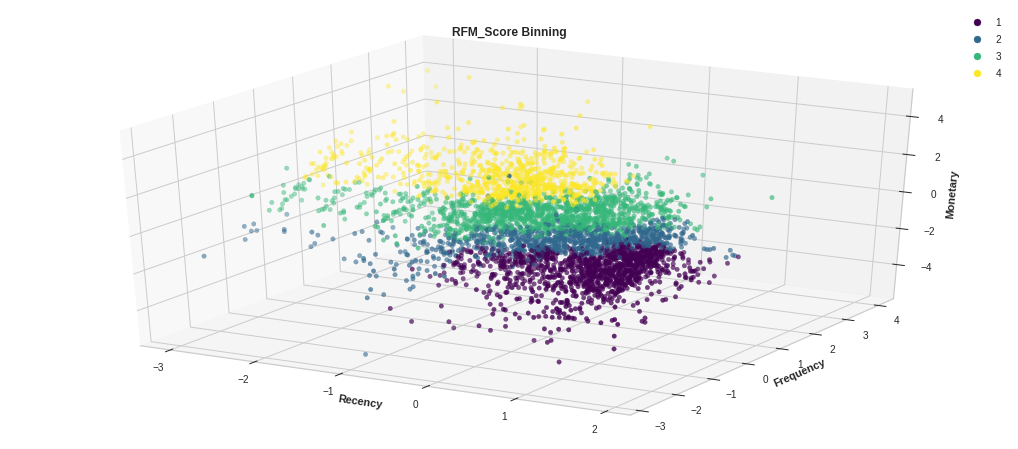

,Recency,Frequency,Monetary
Binning_Segment_,,,
1,Visited 114 TO 279 days ago,Bought 7 TO 21 Times,Spent Around 141 TO 330 Sterling
2,Visited 40 TO 154 days ago,Bought 19 TO 42 Times,Spent Around 329 TO 708 Sterling
3,Visited 19 TO 79 days ago,Bought 45 TO 99 Times,Spent Around 732 TO 1623 Sterling
4,Visited 10 TO 25 days ago,Bought 121 TO 301 Times,Spent Around 2096 TO 5396 Sterling


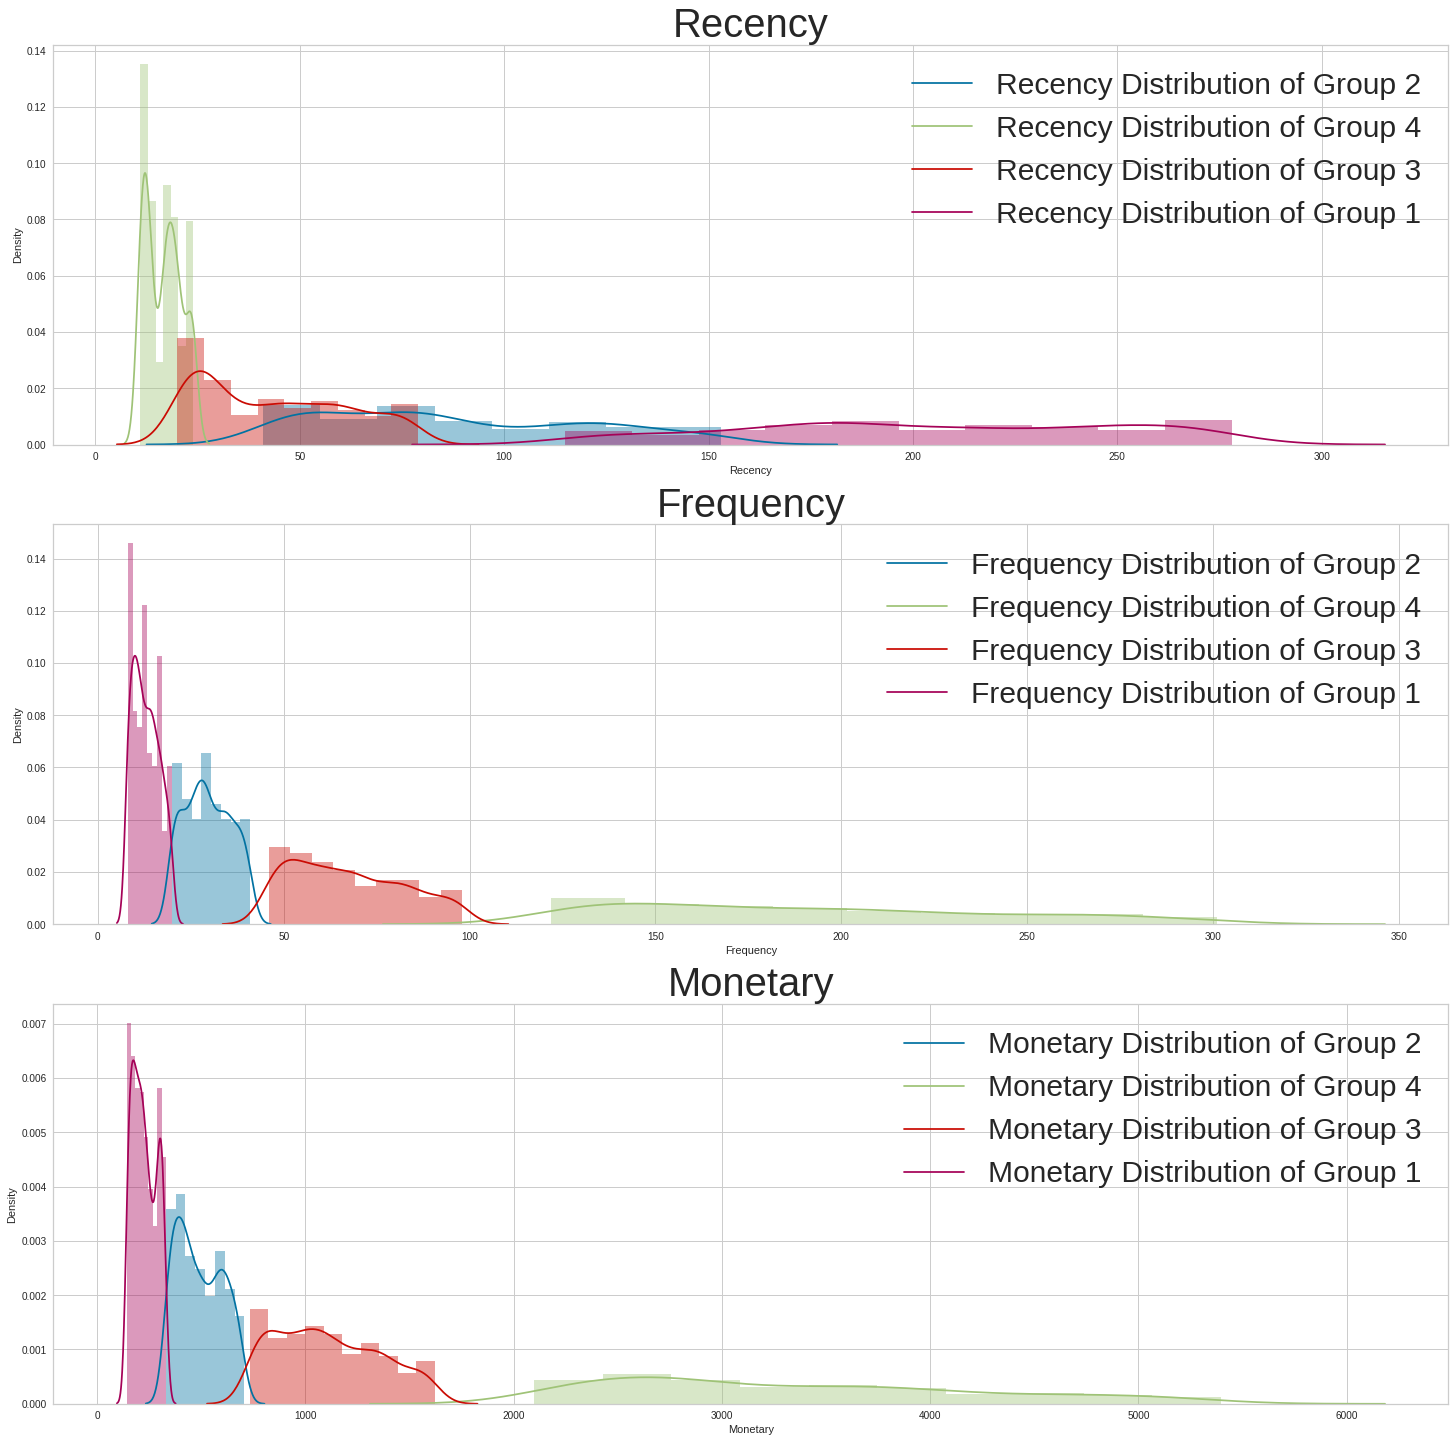

,SEGMENT,RECENCY,FREQUENCY,MONETARY,DESCRIPTION
,1,Visited 6 TO 7 MONTHS ago,Visited 15,LOW,LOST CUSTOMERS
,2,Visited 2 TO 3 MONTHS ago,OCASSIONAL,MID-LOW,CHEAP CUSTOMERS
,3,Visited 1 to 2 MONTHS ago,OFTEN,MID-HIGH,GOOD CUSTOMERS
,4,1MONTH to 12MONTHS,FREQUENT,HIGH,BEST CUSTOMERS


In [322]:
# Splitting RFM_Score in 4 bins based on quantiles
y_bin = pd.qcut(rfm['RFM_Score'], q=4, labels=[1,2,3,4]).astype(int)

# Plotting Segments for Visualization
title = 'RFM_Score Binning'
segmented_data=plotc(y_bin,title,"Binning_Segment_",0.25)

display(segmented_data.style.background_gradient(cmap="plasma").highlight_max(subset=['Frequency','Monetary']))

# Summarizing the results bssed on the above table

display(summary)


,SEGMENT,RECENCY,FREQUENCY,MONETARY,DESCRIPTION
,1,Visited 6 TO 7 MONTHS ago,Visited 15,LOW,LOST CUSTOMERS
,2,Visited 2 TO 3 MONTHS ago,OCASSIONAL,MID-LOW,CHEAP CUSTOMERS
,3,Visited 1 to 2 MONTHS ago,OFTEN,MID-HIGH,GOOD CUSTOMERS
,4,15 to 30 DAYS,FREQUENT,HIGH,BEST CUSTOMERS


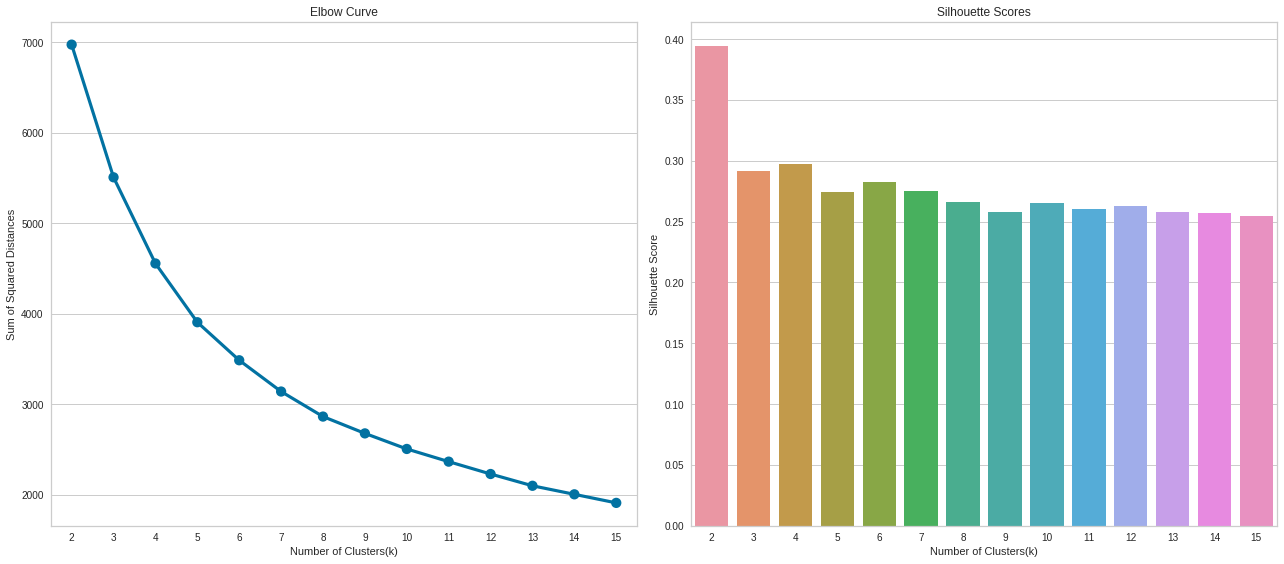

In [299]:
# Storing sum of squared distances and Silhouette Scores for each value of k in k means clusterer
ssd,score = [],[]
plt.figure(figsize=(18,8))
n_clusters = list(range(2,16))
for k in n_clusters:
    clusterer = KMeans(n_clusters = k, init= 'k-means++', max_iter= 1000)
    y_preds = clusterer.fit_predict(X)
    ssd.append(clusterer.inertia_)
    score.append(silhouette_score(X, y_preds))

# Plotting Elbow curve to find optimal K
plt.subplot(1, 2, 1)
sns.pointplot(x=n_clusters, y=ssd)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Curve')

# Silhouette Score v/s Number of Clusters
plt.subplot(1, 2, 2)
sns.barplot(x=n_clusters, y=score)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.tight_layout()

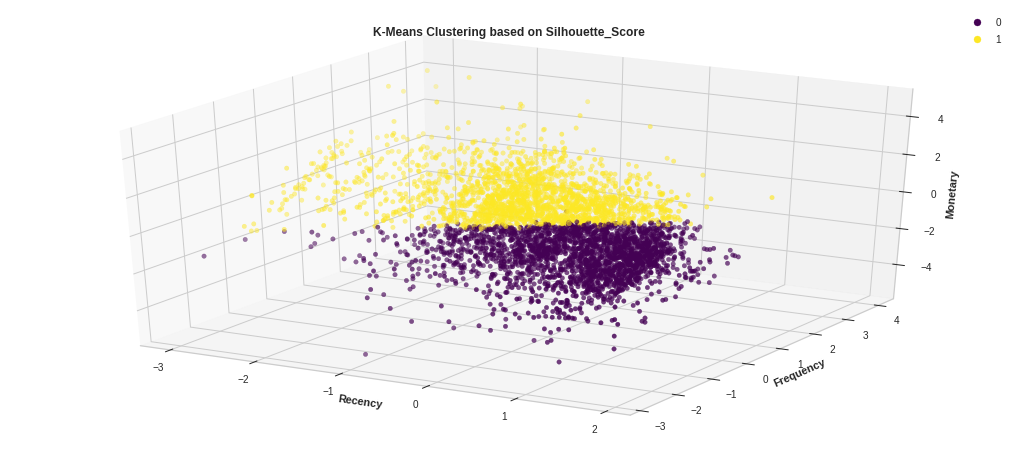

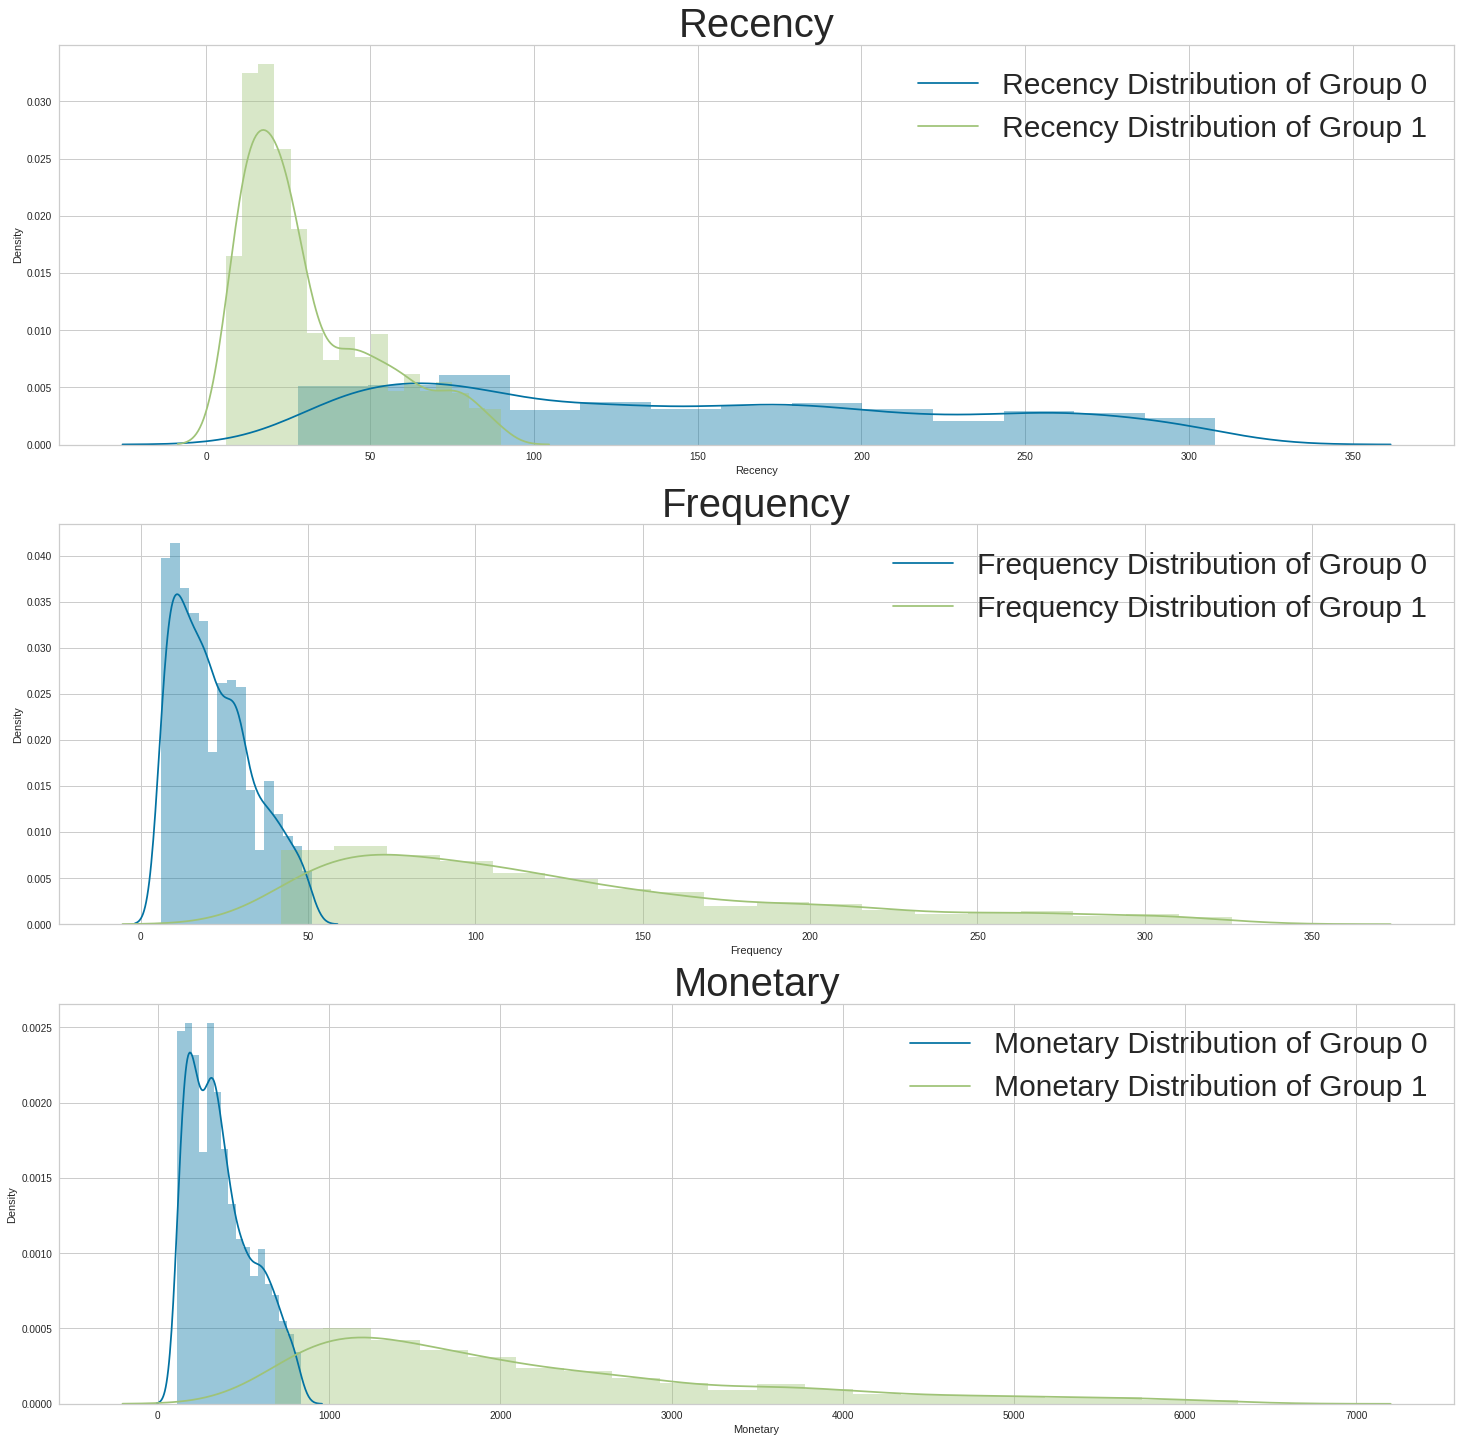

Recency          Frequency            Monetary            \
                      mean median        mean median         mean    median   
kmeans_segment                                                                
0               160.849332  135.0   24.736644   19.0   462.906679   329.625   
1                39.323212   24.0  171.622748  108.0  4003.132008  1802.910   

               Count kmeans_segment  
                                     
kmeans_segment                       
0                              2396  
1                              1943

In [305]:
# Fitting the model on n_clusters = 2 based on Silhouette_Score to visualise the segments.
kmc = KMeans(n_clusters=2)
y_kmc = kmc.fit_predict(X)
centers = kmc.cluster_centers_

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Silhouette_Score'
plotc(y_kmc,title,'kmeans_segment',0.1)

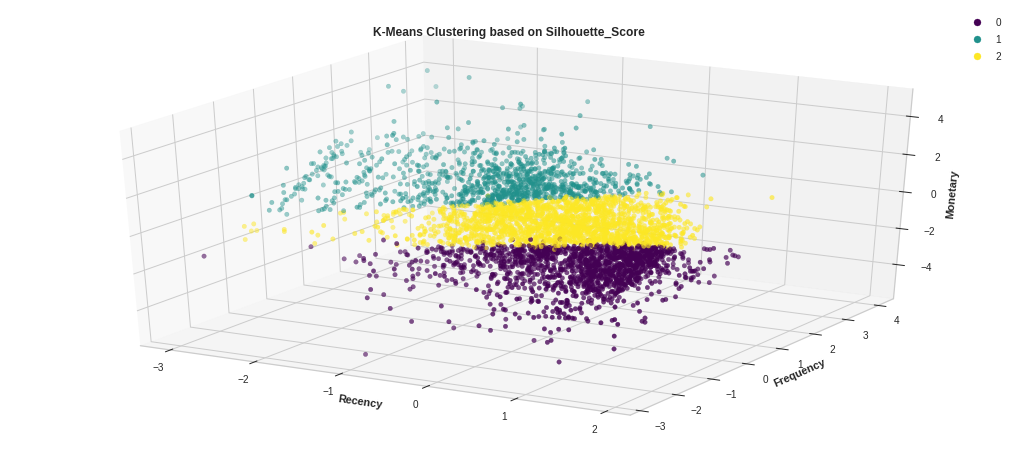

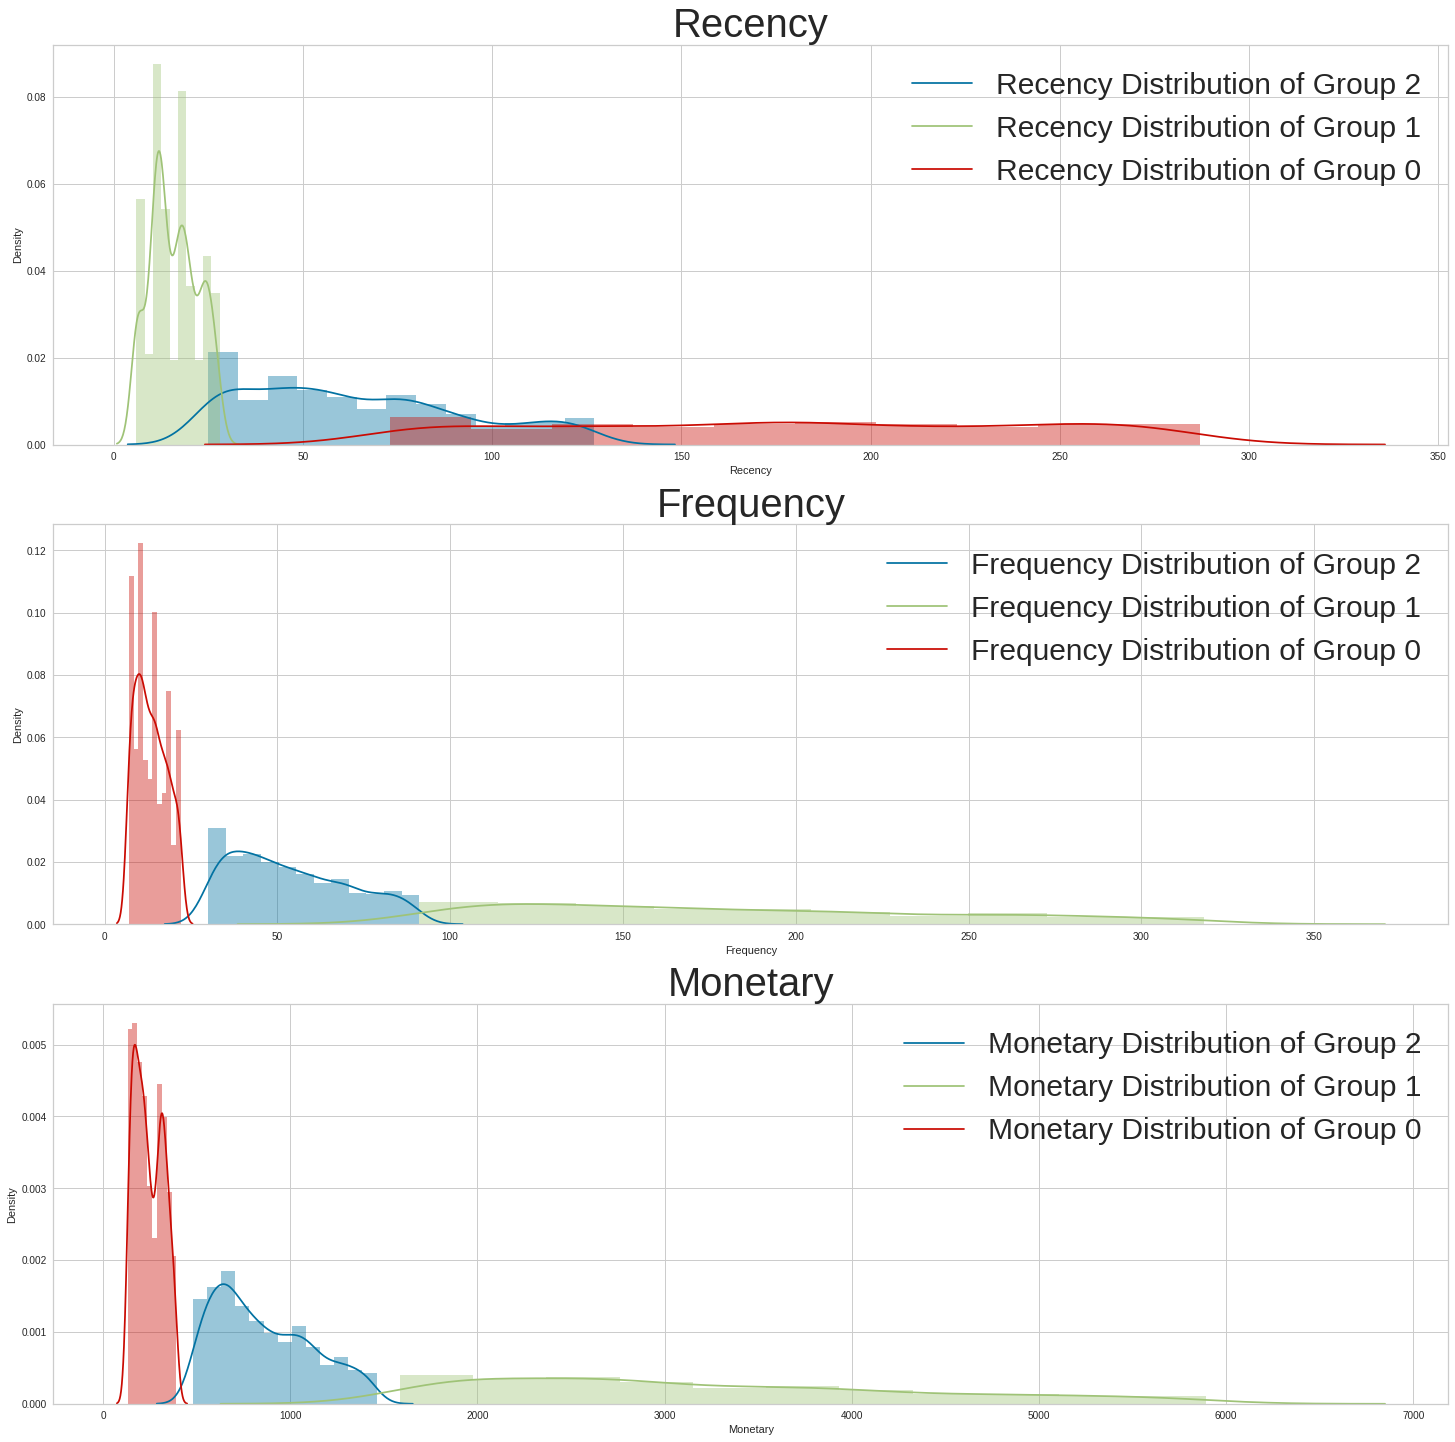

Recency          Frequency            Monetary            \
                      mean median        mean median         mean    median   
kmeans_segment                                                                
0               192.900131  179.0   15.431012   13.0   294.546604   232.540   
1                20.361194   16.0  252.897512  167.0  6391.637075  2919.810   
2                81.535872   59.0   63.512141   52.0  1112.204582   802.525   

               Count kmeans_segment  
                                     
kmeans_segment                       
0                              1522  
1                              1005  
2                              1812

In [303]:
# Fitting the model on n_clusters = 2 based on Silhouette_Score to visualise the segments.
kmc = KMeans(n_clusters=3)
y_kmc = kmc.fit_predict(X)
centers = kmc.cluster_centers_

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Silhouette_Score'
plotc(y_kmc,title,'kmeans_segment',0.2)

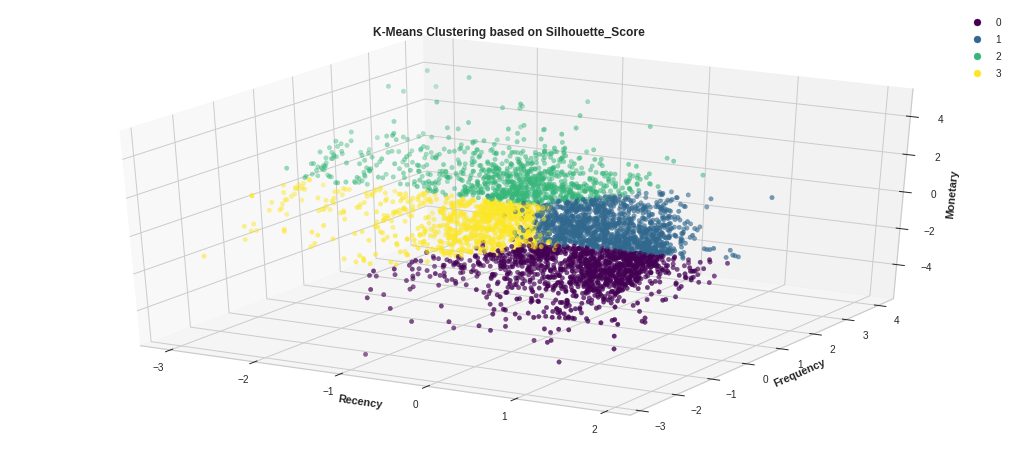

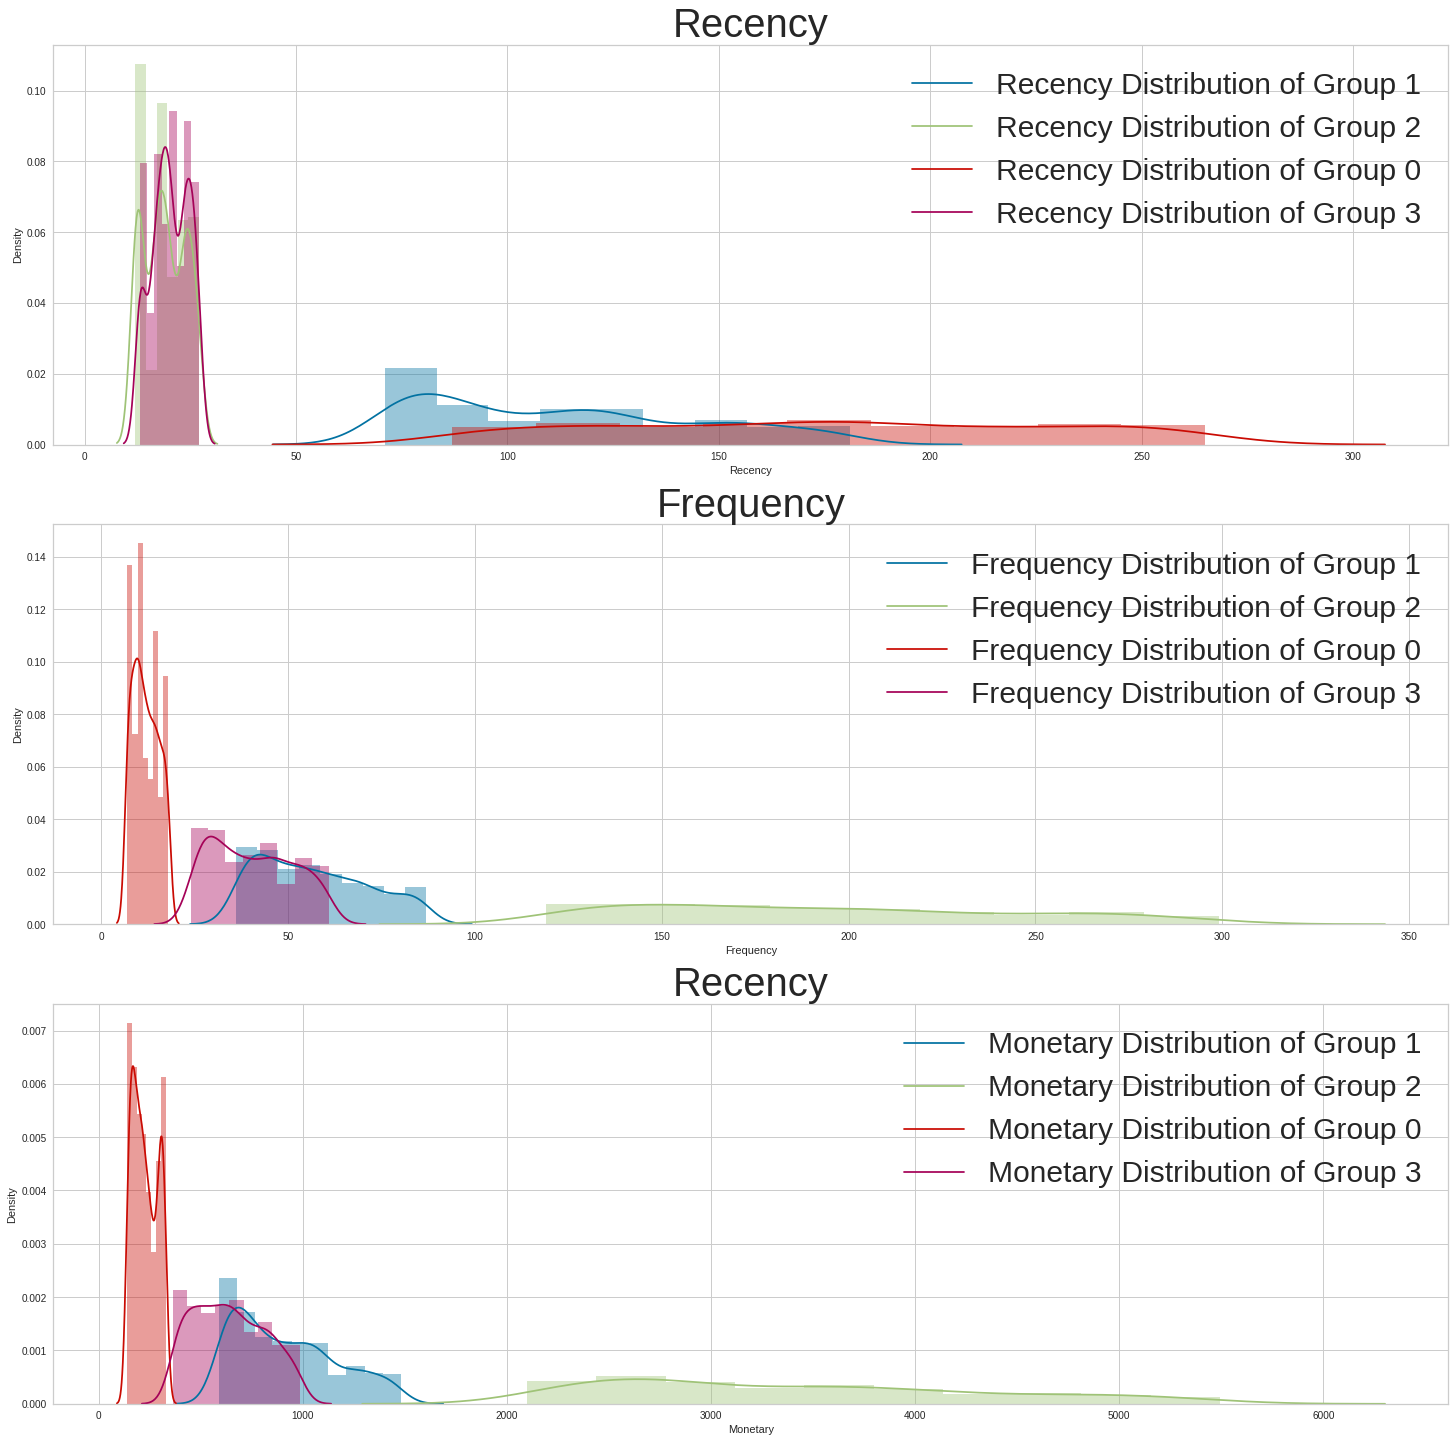

Recency          Frequency            Monetary            \
                      mean median        mean median         mean    median   
kmeans_segment                                                                
0               194.057839  177.5   13.398782   12.0   270.810153   217.980   
1               134.562500  109.0   68.588141   54.0  1256.112150   879.205   
2                22.631637   18.0  275.007743  188.0  6999.434513  3280.800   
3                21.093929   20.0   46.873998   40.0   728.807090   628.780   

               Count kmeans_segment  
                                     
kmeans_segment                       
0                              1314  
1                              1248  
2                               904  
3                               873

In [267]:
# Fitting the model on n_clusters = 2 based on Silhouette_Score to visualise the segments.
kmc = KMeans(n_clusters=4)
y_kmc = kmc.fit_predict(X)
centers = kmc.cluster_centers_

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Silhouette_Score'
plotc(y_kmc,title,'kmeans_segment')

## We can make 4 groups of customers of similar activities

- **Group 1** 
|Group | Recency | Frequency | Monetary |
| ---| --- | --- | --- |
| **Group1**     | **R-Tier-1 (most recent)** | **F-Tier-1 (most frequent)** | 	**M-Tier-1 (highest spend)** |
| **Group2** | **R-Tier-2** | **F-Tier-2** | 	**M-Tier-2** |
| **Group3** | **R-Tier-3** | **F-Tier-3** | **M-Tier-3** |
| **Group4** | **R-Tier-4 (least recent)** | **F-Tier-4 (only one transaction)** | **M-Tier-4 (lowest spend)** |

1. **Best Customers** - Customer from this group will have **Recency , Frequency ,Monetary as R-Tier-1, F-Tier-1 and M-Tier-1** respectively , In short we can indicate rfm as **1-1-1**

2. **High Spending New Customers**- Customers from this group can be indicated as **1-4-2** transacted very less frequent but having good rank in Recency and Monetary

3. **Lowest-Spending Active Loyal Customers**- Customers from this group can be indicated in short notation as **1-1-3** or **1-1-4** they purchase frequently and recently with less money spent in purchasing

4. **Churned Best customers**- Customers from this group can be indicated its Recency, Frequency, and Monetary as **4-1-1, 4-1-2, 4-2-1 and 4-2-2**  they transacted frequently and spent a lot, but it’s been a long time since they’ve transacted.

### **Recency,Frequency & Monetary Values Expectations**

1. **High Recency** Values is not good we need **less Recency** values that tells a customer is **Good Customer**
2. **High Frequency** Values is quality of **Good Customer** we should not have **less Frequency** values 
3. **High Monetary** Values is quality of **Good Customer** we should not have **less Monetary** values 


In [ ]:
rank_quantiles=RFM_chart.quantile([0.25,0.5,0.75]).to_dict()
rank_quantiles

NameError: ignored

In [ ]:
def return_R_score(value,feature,rank_quantiles):
    if value <= rank_quantiles[feature][0.25]:
        return 1
    elif value <= rank_quantiles[feature][0.5]:
        return 2
    elif value <= rank_quantiles[feature][0.75]:
        return 3
    else  :
        return 4
    
def return_FM_score(value,feature,rank_quantiles):
    if value <= rank_quantiles[feature][0.25]:
        return 4
    elif value <= rank_quantiles[feature][0.5]:
        return 3
    elif value <= rank_quantiles[feature][0.75]:
        return 2
    else :
        return 1
    
    

In [ ]:
RFM_chart["Recency_Score"]=RFM_chart["Recency"].apply(lambda x:return_R_score(x,"Recency",rank_quantiles))
RFM_chart["Frequency_Score"]=RFM_chart["Frequency"].apply(lambda x:return_FM_score(x,"Frequency",rank_quantiles))
RFM_chart["Monetary_Score"]=RFM_chart["Monetary"].apply(lambda x:return_FM_score(x,"Monetary",rank_quantiles))

In [ ]:
# Combining the scores
RFM_chart["RFM_group"]=RFM_chart.apply(lambda x:f'{int(x["Recency_Score"])}{int(x["Frequency_Score"])}{int(x["Monetary_Score"])}',axis=1)

In [ ]:
# Summing the scores
RFM_chart["RFM_Score"]=RFM_chart.apply(lambda x:int(x["Recency_Score"]+ x["Frequency_Score"]+x["Monetary_Score"]),axis=1)

In [ ]:
RFM_chart

## Conversion of RFM_Score (Continues values) to Ranks (by performing binning)
 - Assigning badges like Platinum, Gold , Silver , Bronze to the customers depending upon the RFM Scores obtained
 - Badges i.e. Platinum, Gold, Silver, Bronze are ordinal.

In [ ]:
badge_level=['Platinum', 'Gold', 'Silver', 'Bronze']
# score_bins=
RFM_chart["Customer_Badge"]=pd.cut(RFM_chart["RFM_Score"],bins=4,labels=badge_level)


In [ ]:
sns.distplot(RFM_chart["Recency"])
plt.title("Distribution of Recency")
plt.show()

In [ ]:
sns.distplot(RFM_chart[RFM_chart["Frequency"]<1000]["Frequency"])
plt.title("Distribution of Frequency")
plt.show()


In [ ]:

sns.distplot(RFM_chart[RFM_chart["Monetary"]<2000]["Monetary"])
plt.title("Distribution of Monetary")
plt.show()

## Recency Frequency and Monetary are right skewed (need to normalize the data)

In [ ]:
log_transformed_RFM_chart=RFM_chart[["Recency",'Frequency',"Monetary"]].apply(lambda x: np.log(x+1),axis=1)
log_transformed_RFM_chart

In [ ]:
for i in log_transformed_RFM_chart:
    sns.distplot(log_transformed_RFM_chart[i])
    plt.show()

In [ ]:
sns.distplot(log_transformed_RFM_chart["Recency"])

- Skewness  of Recency feature is decreased 

In [ ]:
sns.distplot(log_transformed_RFM_chart["Frequency"])

- Skewness  of Frequency feature is decreased 

In [ ]:
sns.distplot(log_transformed_RFM_chart["Monetary"])

- Skewness  of Monetary feature is decreased 

## By applying log transformation skewness of all the features i.e. Recency, Frequency, Monetary is decreased and all features are normally distributed

## Scaling the log transformed features 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=StandardScaler()
scaled_RFM_chart=pd.DataFrame(scaler.fit_transform(log_transformed_RFM_chart),
                               index=log_transformed_RFM_chart.index,
                               columns=log_transformed_RFM_chart.columns)


# 1. K-Means algorithm
### Checking the sum of squared residuals of K-Means algorithm from cluster 1 to 15

In [ ]:
wcss=[]

for i in range(1,16):
    kmeans=KMeans(n_clusters=i,)
    kmeans.fit(scaled_RFM_chart)
    wcss.append(kmeans.inertia_)

In [ ]:
plt.plot(range(1,16),wcss)
plt.plot(range(1,16),wcss, marker="o", markersize=10, markeredgecolor="red")
plt.xlabel("Number of Clusters")
plt.ylabel("sum of Squarted Distance")
plt.title("Elbow Method")

- Having 4 clusters could be optimal by visualizing the elbow graph

## Checking the Silhouette score for range of clusters from 2 to 16 


In [ ]:
for i in range(2,16):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled_RFM_chart)
    RFM_chart_1=RFM_chart.copy()
    print(f'Silhouette  score {i} clusters is {silhouette_score(scaled_RFM_chart,kmeans.labels_,metric="euclidean")}')

- Silhouette score for 2 clusters is maximum we can choose k or n_clusters as 2 But this decision would be optimum only in metrics point of view
- Hence From business point of view we need to at least make a group of 3 or more in order to differentiate the customers based on there activities
- Having **4** clusters gives us good value of 0.3 which is maximum

In [ ]:
for i in range(3,7):
    kmeans=KMeans(i,init="k-means++")
    visualizer=SilhouetteVisualizer(kmeans,colors='yellowbrick')
    visualizer.fit(scaled_RFM_chart)
    visualizer.show()

In [ ]:
kmeans=KMeans(n_clusters=4)
labels=kmeans.fit_predict(scaled_RFM_chart)
RFM_chart_1["Segment"]=labels
RFM_chart_1["Segment"]=RFM_chart_1["Segment"].apply(lambda x:f"Group {x+1}")
sns.scatterplot(scaled_RFM_chart.values[labels==0,0],scaled_RFM_chart.values[labels==0,1],s=100,label="Platinum",alpha=.5)
sns.scatterplot(scaled_RFM_chart.values[labels==1,0],scaled_RFM_chart.values[labels==1,1],s=100,label="New Customers",alpha=.5)
sns.scatterplot(scaled_RFM_chart.values[labels==2,0],scaled_RFM_chart.values[labels==2,1],s=100,label="Customer about to lose",alpha=.5)
sns.scatterplot(scaled_RFM_chart.values[labels==3,0],scaled_RFM_chart.values[labels==3,1],s=100,label="Old platinum Customers",alpha=.5)
# sns.scatterplot(scaled_RFM_chart.values[labels==4,0],scaled_RFM_chart.values[labels==4,1],s=100,label="Old platinum",alpha=.5)
plt.show()
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(scaled_RFM_chart["Recency"],
           scaled_RFM_chart["Frequency"],
           scaled_RFM_chart["Monetary"],
           s=40, c=labels, marker='o',cmap="Paired" )
ax.set_title("The Plot Of The Clusters")
plt.show()
fig = px.scatter_3d(scaled_RFM_chart, x='Recency', y='Frequency', z='Monetary',
                    color=labels,)
fig.show()
display(RFM_chart_1[["Recency","Frequency","Monetary","Segment"]].groupby("Segment").agg(['mean','median','count']).style.bar())

- **Group1** - Having Count of 
- **Group2** - Having Count of 
- **Group3** - Having Count of 
- **Group4** - Having Count of 

# 2. Hierarchical Clustering

In [ ]:
heirar_cluster=AgglomerativeClustering(n_clusters=4)
labels=heirar_cluster.fit_predict(scaled_RFM_chart)

In [ ]:
RFM_chart_1["Segment"]=labels
RFM_chart_1["Segment"]=RFM_chart_1["Segment"].apply(lambda x:f"Group {x+1}")
sns.scatterplot(scaled_RFM_chart.values[labels==0,0],scaled_RFM_chart.values[labels==0,1],s=100,label="Platinum",alpha=.5)
sns.scatterplot(scaled_RFM_chart.values[labels==1,0],scaled_RFM_chart.values[labels==1,1],s=100,label="New Customers",alpha=.5)
sns.scatterplot(scaled_RFM_chart.values[labels==2,0],scaled_RFM_chart.values[labels==2,1],s=100,label="Customer about to lose",alpha=.5)
sns.scatterplot(scaled_RFM_chart.values[labels==3,0],scaled_RFM_chart.values[labels==3,1],s=100,label="Old platinum Customers",alpha=.5)
# sns.scatterplot(scaled_RFM_chart.values[labels==4,0],scaled_RFM_chart.values[labels==4,1],s=100,label="Old platinum",alpha=.5)
plt.show()
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(scaled_RFM_chart["Recency"],
           scaled_RFM_chart["Frequency"],
           scaled_RFM_chart["Monetary"],
           s=40, c=labels, marker='o',cmap="viridis" )
ax.set_title("The Plot Of The Clusters")
plt.show()
fig = px.scatter_3d(scaled_RFM_chart, x='Recency', y='Frequency', z='Monetary',
                    color=labels,)
fig.show()
display(RFM_chart_1[["Recency","Frequency","Monetary","Segment"]].groupby("Segment").agg(['mean','median','count']).style.bar())

In [ ]:
sns.clustermap(scaled_RFM_chart.sample(50),cmap="vlag")